# Import libraries

In [0]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb

import warnings

pd.set_option('max_columns', 200)

In [2]:
from google.colab import files
uploaded_train = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded_test = files.upload()

Saving test.csv to test.csv


In [4]:
train = pd.read_csv(io.BytesIO(uploaded_train['train.csv']))
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
test =  pd.read_csv(io.BytesIO(uploaded_test['test.csv']))
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [6]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


# Plotting

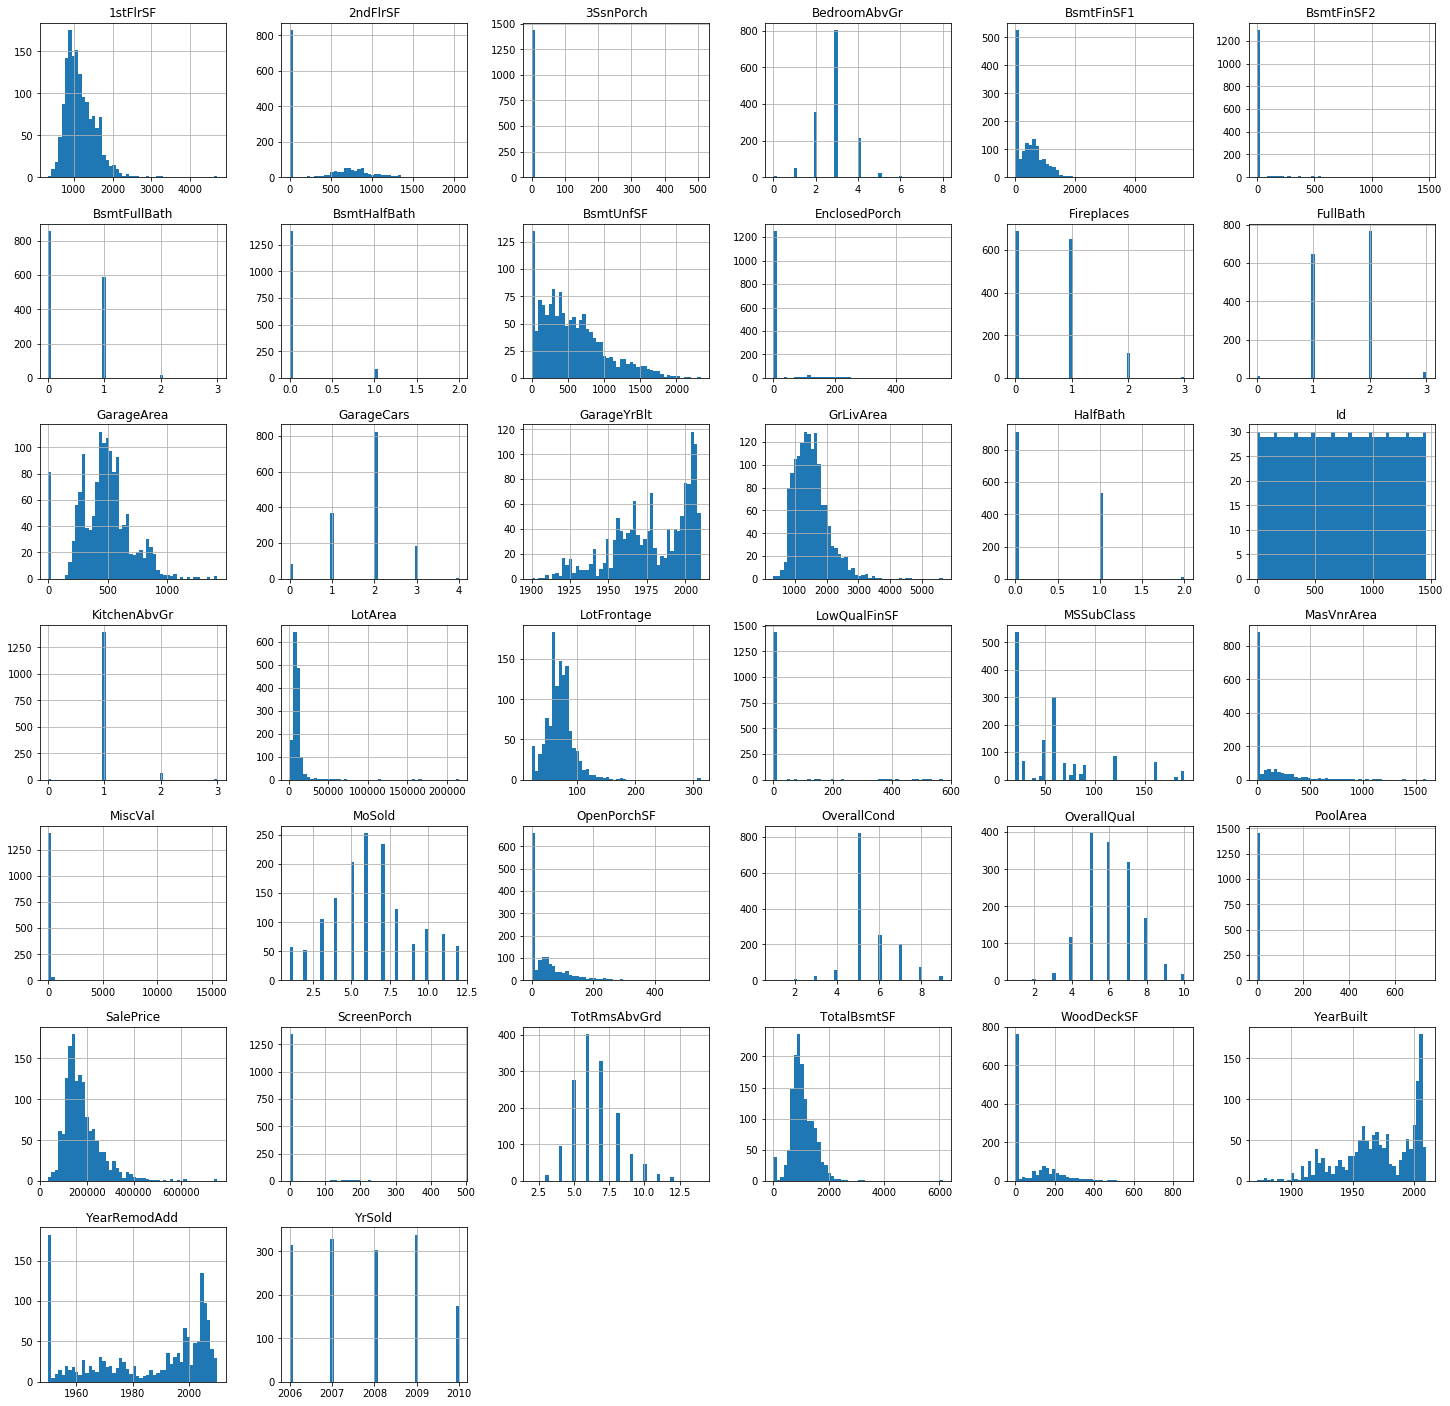

In [7]:
train.hist(bins=50, figsize=(25,25))
plt.show()



> Distribution SalePrice



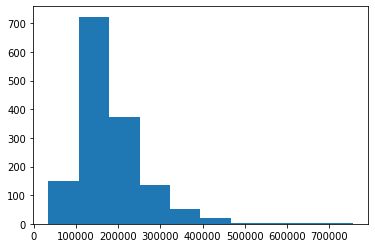

In [8]:
plt.hist(train['SalePrice'])
plt.show()

**The above histogram shows Skewness in target variable "Sale price". Let's confirm the same from normality test**

> Shapiro-Wilk test for normality. Normal Q-Q (quantile-quantile) plots.

*   Normally distributed should fall on straight line through first/third (middle) quartiles



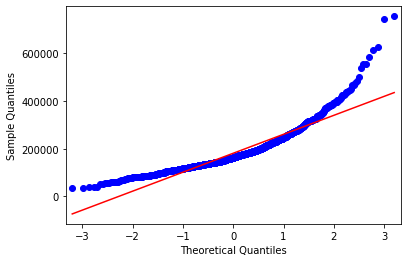

In [9]:
from statsmodels.graphics.gofplots import qqplot

qqplot(train['SalePrice'], line='s')
plt.show()

**Spread of salesprice over 4 quartile**

In [10]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(train['SalePrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.870, p=0.000
Sample does not look Gaussian (reject H0)


**Shapiro normality test**

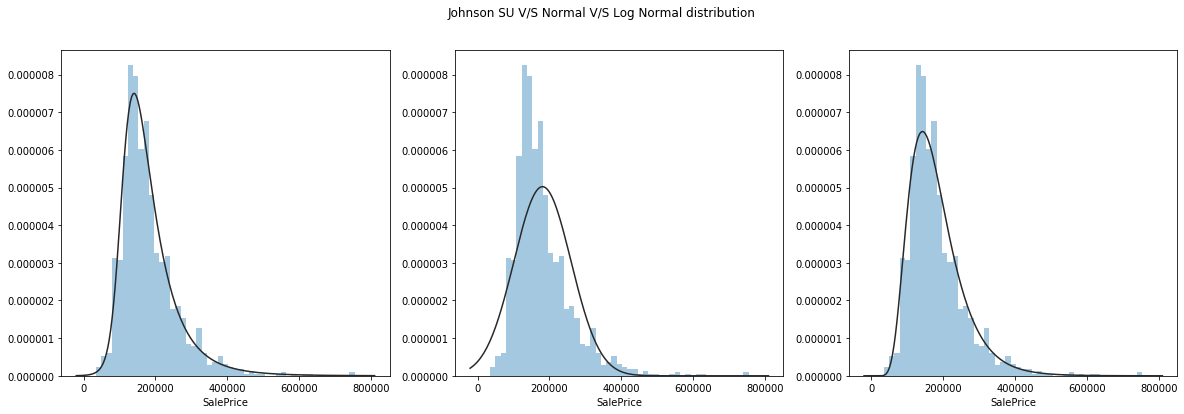

In [11]:
import scipy.stats as st
y = train['SalePrice']
fig, ax =plt.subplots(1,3,figsize=(20,6))
plt.suptitle('Johnson SU V/S Normal V/S Log Normal distribution')
sns.distplot(y, kde=False, fit=st.johnsonsu,ax=ax[0])
sns.distplot(y, kde=False, fit=st.norm,ax=ax[1])
sns.distplot(y, kde=False, fit=st.lognorm,ax=ax[2])
fig.show()

**Correlation map of salesprice with numerical column**

In [12]:
numerical = [f for f in train.columns if train.dtypes[f] != 'object']
numerical.remove('SalePrice')
# we don't required (Id not a feature)
numerical.remove('Id')
categorical = [f for f in train.columns if train.dtypes[f] == 'object']
print("numerical=",numerical)
print("categorical=",categorical)

numerical= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
categorical= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 

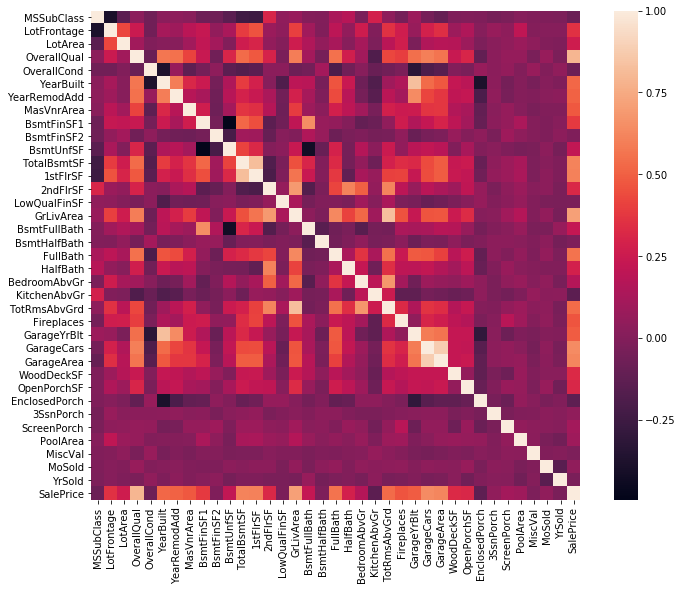

In [13]:
num = numerical + ['SalePrice']
corrmat = train[num].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

# Split variables in numerical (discrete, continuous) and categorical (ordinal, nominal)

> Continiuous - infinite options

> Discrete - finite options

> Ordinal - data has a hierarchy

> Nominal - data has no herarchy



![alt text](http://survivestatistics.com/wp-content/uploads/2016/07/variables3.jpg)

[Image Source](http://survivestatistics.com/variables/)

In [14]:
num = np.array(train.dtypes!="object")
print("numeric type",sum(num) )
cat = np.array(train.dtypes=="object")
print("object type", sum(cat))

numeric type 38
object type 43


In [0]:
num_discrete = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                'Fireplaces','GarageCars','GarageYrBlt','YearBuilt','YearRemodAdd','YrSold','MoSold']

num_continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                  '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                  '3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

cat_ordinal = ['LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',
               'Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond',
               'PavedDrive','PoolQC','Fence']

cat_nominal = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
               'Exterior2nd','MasVnrType','Foundation','Heating','GarageType','MiscFeature',
               'SaleType','SaleCondition']

# Remove outliers with Low Price


> We can define as outliers all the values with z score > 3 or z score < 3. The number of outliers of the features with, at least, weak correlation with Sale Price and a low % of zeros will be presented. Then, the scatterplots of the variables will be plotted to detect the outliers with Low Price.


---







> Defining a z score function. It will return a normalized value (z-score) based on **the mean and standard deviation**. *A z-score, or standard score*, is used for standardizing scores on the same scale by dividing a score’s deviation by the standard deviation in a data set. The result is a standard score. *It measures the number of standard deviations that a given data point is from the mean.*



In [0]:
def z_score(df): 
    return (df-df.mean())/df.std(ddof=0)

In [17]:
# Let's take a look at the number of outliers of the variables with correlation > 0.3 and % of zeros < 30%

idx = []
outliers = []
corrs = []
zeros = []

for i in num_continuous:
    if str(train[i].dtype) != 'object':
        idx.append(i)
        outliers.append(list(abs(z_score(train[i])) > 3).count(True))
        corrs.append(train.SalePrice.corr(train[i]))
        zeros.append(len(train[i][train[i] == 0])/len(train[i]))
        
outs = pd.DataFrame({'# Outliers': outliers, 
                     'Feature': idx, 
                     'Corr': corrs, 
                     '% Zeros': zeros}).sort_values(ascending = False, 
                                                 by = '# Outliers')

outs = outs[outs["# Outliers"] > 0]
outs = outs[abs(outs["Corr"]) > 0.3].reset_index(drop=True)
outs = outs[outs["% Zeros"] < 0.3].reset_index(drop=True)
outs

# Outliers      Feature      Corr   % Zeros
0          22    SalePrice  1.000000  0.000000
1          16    GrLivArea  0.708624  0.000000
2          12     1stFlrSF  0.605852  0.000000
3          12  LotFrontage  0.351799  0.000000
4          10  TotalBsmtSF  0.613581  0.025342
5           7   GarageArea  0.623431  0.055479

In [0]:
# defining a function to plot the correlation of the variables shown above with SalePrice, so we can delete Low Price's outliers
from matplotlib.gridspec import GridSpec
def plot_outliers():
    
    fig = plt.figure(figsize=(15,15), constrained_layout=True)

    gs = GridSpec(3,2,figure=fig)

    rows = [0,0,1,1,2,2]
    columns = [0,1,0,1,0,1]

    colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

    counter = 0

    for i in outs.Feature:
        sns.scatterplot(y=train.SalePrice, x=train[i], 
                      ax=fig.add_subplot(gs[rows[counter],columns[counter]]),
                      color=colors[counter])
        counter = counter + 1

    fig.show()

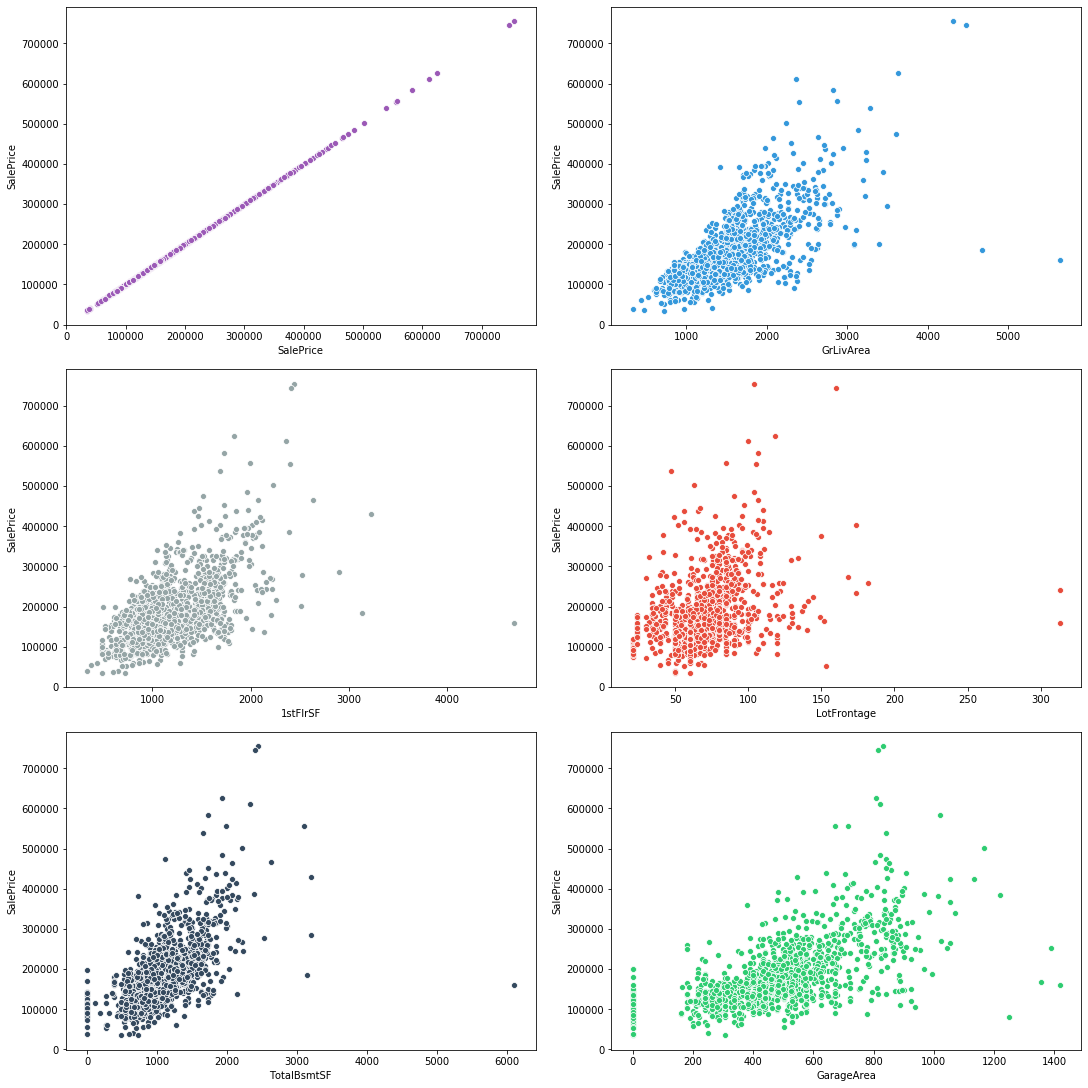

In [19]:
plot_outliers()



> As we can see there are two outliers with low price for GrLivArea, let's remove them.



In [20]:
train.shape

(1460, 81)

In [0]:
# removing GrLivArea outliers with Low Price
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

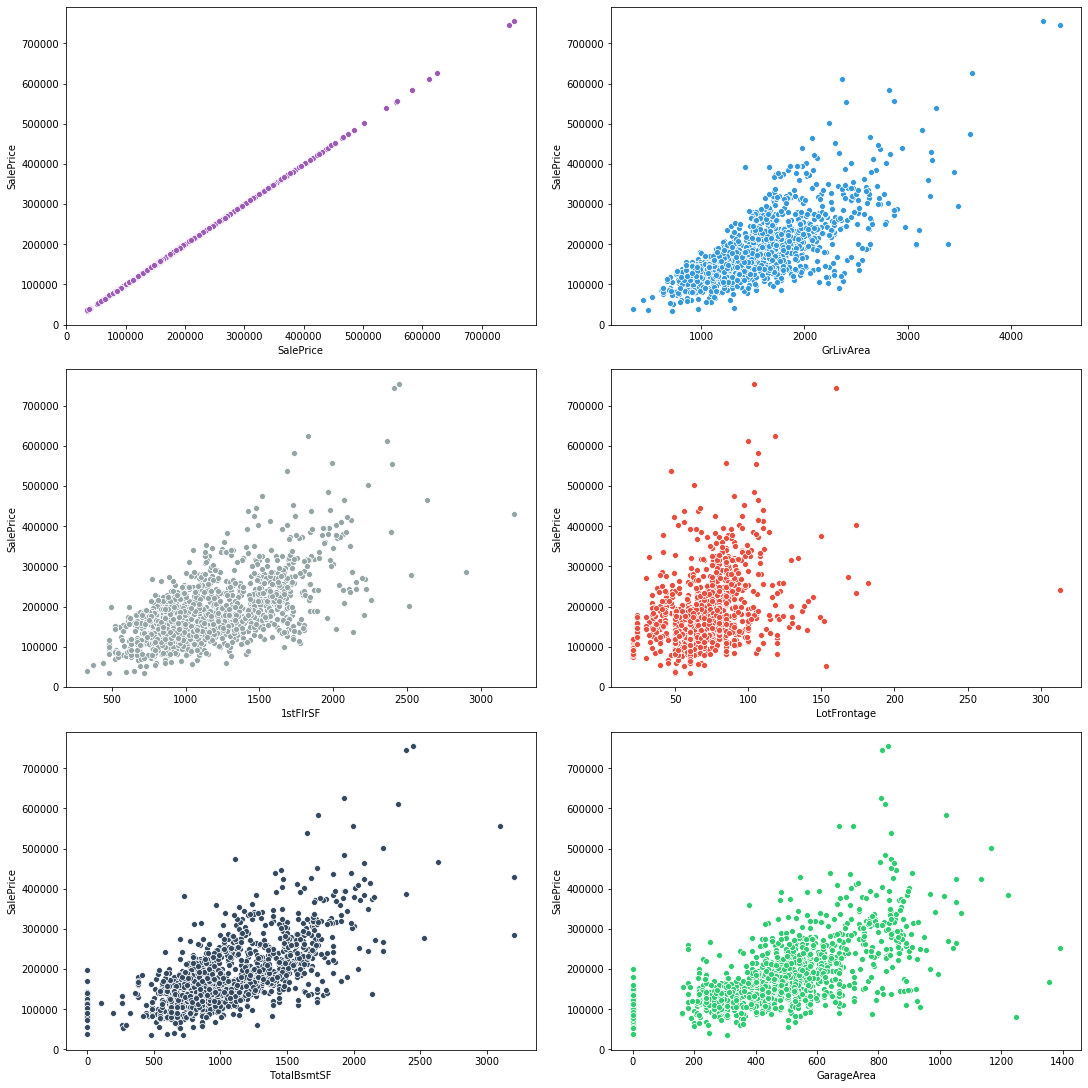

In [22]:
# plotting again
plot_outliers()

In [23]:
train.shape

(1458, 81)


> Ok, now it's enough. We can't delete a lot of outliers, because it can affect the results.





> Let's concatenate train and test sets into one, so we can analyze everything and fill NaN's based on all dataset.




In [0]:
dataset = pd.concat([train,test],axis=0,sort=False).reset_index(drop=True)
dataset = dataset.fillna(np.nan)

# Replace NaN's

> First, let's map all the missing data and then fill them based on median (if continuous) or mode (otherwise) or NA (if written in description).



---



In [25]:
# defining a function to map the # and % of NaN's for the features
def show_null(df):
    null_columns = (df.isnull().sum(axis = 0)/len(df)).sort_values(ascending=False).index
    null_data = pd.concat([df.isnull().sum(axis = 0),
                           (df.isnull().sum(axis = 0)/len(df)).sort_values(ascending=False),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes]
                          , axis=1)
    null_data = null_data.rename(columns={0: '#', 
                                          1: '% null', 
                                          2: 'type'}).sort_values(ascending=False, by = '% null')
    null_data = null_data[null_data["#"]!=0]
    return null_data

show_null(dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#    % null     type
PoolQC        2908  0.996915   object
MiscFeature   2812  0.964004   object
Alley         2719  0.932122   object
Fence         2346  0.804251   object
SalePrice     1459  0.500171  float64
FireplaceQu   1420  0.486802   object
LotFrontage    486  0.166610  float64
GarageQual     159  0.054508   object
GarageFinish   159  0.054508   object
GarageCond     159  0.054508   object
GarageYrBlt    159  0.054508  float64
GarageType     157  0.053822   object
BsmtCond        82  0.028111   object
BsmtExposure    82  0.028111   object
BsmtQual        81  0.027768   object
BsmtFinType2    80  0.027425   object
BsmtFinType1    79  0.027083   object
MasVnrType      24  0.008228   object
MasVnrArea      23  0.007885  float64
MSZoning         4  0.001371   object
BsmtFullBath     2  0.000686  float64
Functional       2  0.000686   object
BsmtHalfBath     2  0.000686  float64
Utilities        2  0.000686   object
KitchenQual      1  0.000343   object
BsmtFinSF1       1  0.000343  float64
BsmtFinSF2       1  0.000343  float64
BsmtUnfSF        1  0.000343  float64
GarageCars       1  0.000343  float64
GarageArea       1  0.000343  float64
Electrical       1  0.000343   object
TotalBsmtSF      1  0.000343  float64
Exterior2nd      1  0.000343   object
Exterior1st      1  0.000343   object
SaleType         1  0.000343   object

In [26]:
# Ordinals - Replacing NaN's

dataset.PoolQC[dataset.PoolQC.isnull() == True] = 'NA'
dataset.Fence[dataset.Fence.isnull() == True] = 'NA'
dataset.FireplaceQu[dataset.FireplaceQu.isnull() == True] = 'NA'
dataset.GarageCond[dataset.GarageCond.isnull() == True] = 'NA'
dataset.GarageQual[dataset.GarageQual.isnull() == True] = 'NA'
dataset.GarageFinish[dataset.GarageFinish.isnull() == True] = 'NA'
dataset.BsmtExposure[dataset.BsmtExposure.isnull() == True] = 'NA'
dataset.BsmtCond[dataset.BsmtCond.isnull() == True] = 'NA'
dataset.BsmtQual[dataset.BsmtQual.isnull() == True] = 'NA'
dataset.BsmtFinType2[dataset.BsmtFinType2.isnull() == True] = 'NA'
dataset.BsmtFinType1[dataset.BsmtFinType1.isnull() == True] = 'NA'
dataset.Electrical[dataset.Electrical.isnull() == True] = stats.mode(dataset.Electrical)[0][0]
dataset.Functional[dataset.Functional.isnull() == True] = stats.mode(dataset.Functional)[0][0]
dataset.KitchenQual[dataset.KitchenQual.isnull() == True] = stats.mode(dataset.KitchenQual)[0][0]
dataset.Utilities[dataset.Utilities.isnull() == True] = stats.mode(dataset.Utilities)[0][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys

In [27]:
# Nominals - Replacing NaN's

dataset.MiscFeature[dataset.MiscFeature.isnull() == True] = 'NA'
dataset.Alley[dataset.Alley.isnull() == True] = 'NA'
dataset.GarageType[dataset.GarageType.isnull() == True] = 'NA'
dataset.MasVnrType[dataset.MasVnrType.isnull() == True] = 'NA'
dataset.MSZoning[dataset.MSZoning.isnull() == True] = stats.mode(dataset.MSZoning)[0][0]
dataset.SaleType[dataset.SaleType.isnull() == True] = stats.mode(dataset.SaleType)[0][0]
dataset.Exterior1st[dataset.Exterior1st.isnull() == True] = stats.mode(dataset.Exterior1st)[0][0]
dataset.Exterior2nd[dataset.Exterior2nd.isnull() == True] = stats.mode(dataset.Exterior2nd)[0][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys

In [28]:
# Some Numericals - Replacing NaN's

dataset.BsmtFullBath[dataset.BsmtFullBath.isnull() == True] = stats.mode(dataset.BsmtFullBath)[0][0]
dataset.BsmtHalfBath[dataset.BsmtHalfBath.isnull() == True] = stats.mode(dataset.BsmtHalfBath)[0][0]
dataset.GarageCars[dataset.GarageCars.isnull() == True] = stats.mode(dataset.GarageCars)[0][0]
dataset.GarageArea[dataset.GarageArea.isnull() == True] = np.median(dataset.
                                                                    GarageArea[dataset.GarageArea.isnull() == False])
dataset.TotalBsmtSF[dataset.TotalBsmtSF.isnull() == True] = np.median(dataset.
                                                                      TotalBsmtSF[dataset.TotalBsmtSF.isnull() == False])
dataset.BsmtFinSF1[dataset.BsmtFinSF1.isnull() == True] = np.median(dataset.
                                                                    BsmtFinSF1[dataset.BsmtFinSF1.isnull() == False])
dataset.BsmtFinSF2[dataset.BsmtFinSF2.isnull() == True] = np.median(dataset.
                                                                    BsmtFinSF2[dataset.BsmtFinSF2.isnull() == False])
dataset.BsmtUnfSF[dataset.BsmtUnfSF.isnull() == True] = np.median(dataset.
                                                                  BsmtUnfSF[dataset.BsmtUnfSF.isnull() == False])
dataset.LotFrontage[dataset.LotFrontage.isnull() == True] = np.median(dataset.
                                                                    LotFrontage[dataset.LotFrontage.isnull() == False])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys



> Special cases:



In [29]:
# MasVnrArea

dataset[dataset.MasVnrArea.isnull() == True].MasVnrType

234     NA
528     NA
649     NA
935     NA
972     NA
976     NA
1242    NA
1277    NA
1689    NA
1704    NA
1880    NA
1990    NA
2002    NA
2039    NA
2309    NA
2323    NA
2338    NA
2347    NA
2366    NA
2590    NA
2655    NA
2684    NA
2860    NA
Name: MasVnrType, dtype: object



> So, we can see that the problem is not lack of information for MasVnrArea, but the NaN values happen just because there is no Masonry veener. Therefore we can define them as 0.



In [30]:
dataset.MasVnrArea[dataset.MasVnrArea.isnull() == True] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
# GarageYrBlt

dataset[["GarageType",
          "GarageFinish",
          "GarageQual",
          "GarageCond",
         "GarageYrBlt"]][dataset.GarageYrBlt.isnull() == True].dropna()

Empty DataFrame
Columns: [GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt]
Index: []



>So, we can see that the problem is not lack of information, but the NaN values happen just because there is no garage. Therefore, we can define them as NA.



In [32]:
dataset.GarageYrBlt[dataset.GarageYrBlt.isnull() == True] = 'NA'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
# Let's see again the # and % of NaN's 
show_null(dataset)

# SalePrice is ok, because NaN values are from test set.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#    % null     type
SalePrice  1459  0.500171  float64

# [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) and data cleaning

> Here we will analyze each feature for Discrete, Continuous, Ordinal and Nominal variables.


---




## **Discrete Variables**

In [0]:
# To remember
num_discrete = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                'Fireplaces','GarageCars','GarageYrBlt','YearBuilt','YearRemodAdd','YrSold','MoSold']


> We will analyze each discrete variable individually and make decisions based on correlation with SalePrice, lack of information in each category and so on.



In [0]:
# defining a function to plot boxplot and stripplot for non continuous variables
def make_discrete_plot(feature, rotation1, rotation2):
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1,2)
    sns.boxplot(y=dataset.SalePrice, x=dataset[feature], ax=fig.add_subplot(gs[0,0]))
    plt.xticks(rotation = rotation1)
    sns.stripplot(y=dataset.SalePrice, x=dataset[feature], ax=fig.add_subplot(gs[0,1]))
    plt.xticks(rotation = rotation2)
    fig.show()

### BsmtFullBath, BsmtHalfBath, FullBath, HalfBath

Number of bathrooms.

---



In [0]:
# Those variables tell almost the same information, so let's add them.
dataset["Baths"] = dataset.BsmtFullBath + 0.5*dataset.BsmtHalfBath + dataset.FullBath + 0.5*dataset.HalfBath

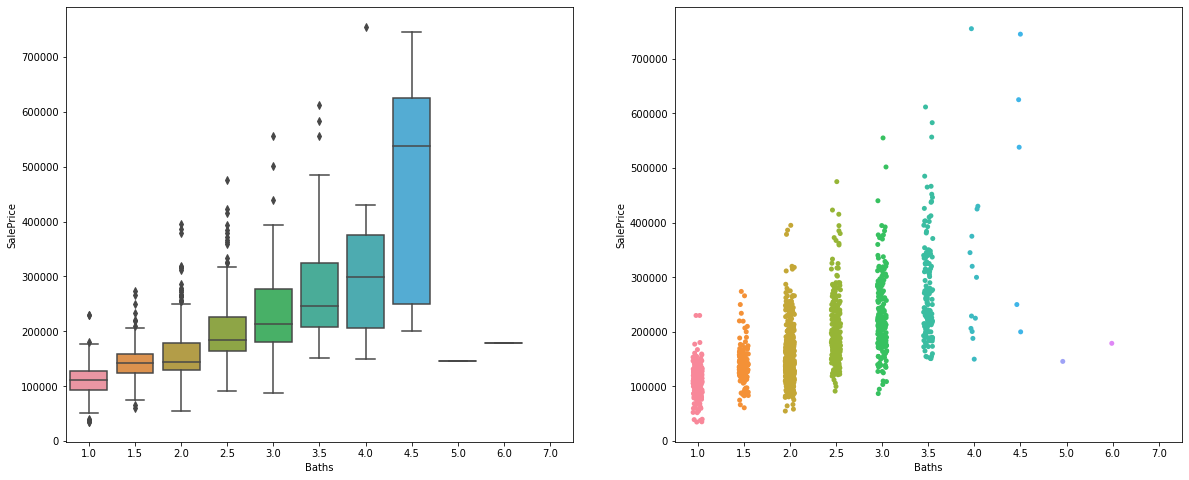

In [37]:
make_discrete_plot("Baths",0,0)

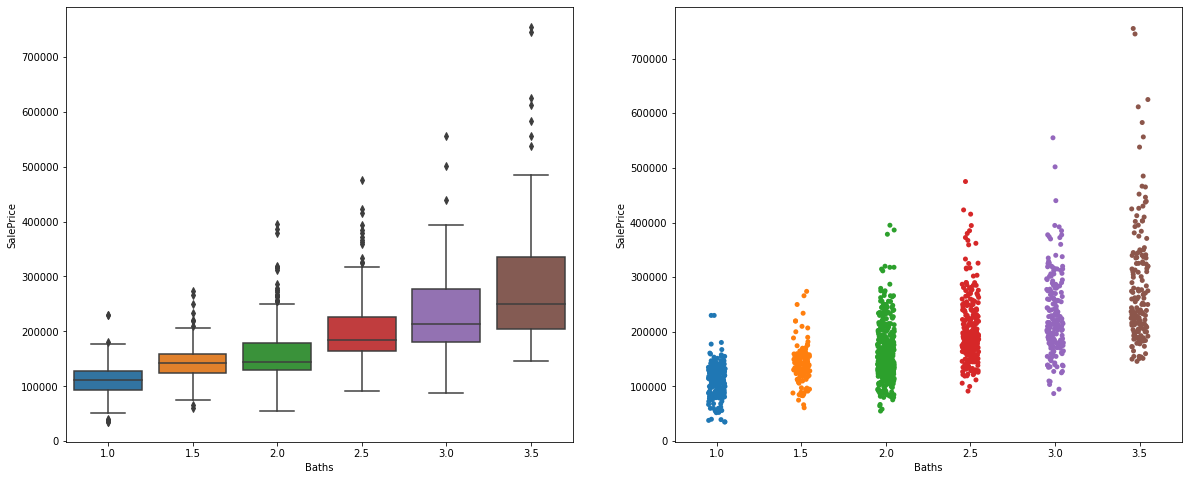

In [38]:
# there few values greater than 4, so let's put them together with 3.5
dataset.Baths = dataset.Baths.apply(lambda x: 3.5 if x > 3.5 else x)
make_discrete_plot("Baths",0,0)

### BedroomAbvGr

---



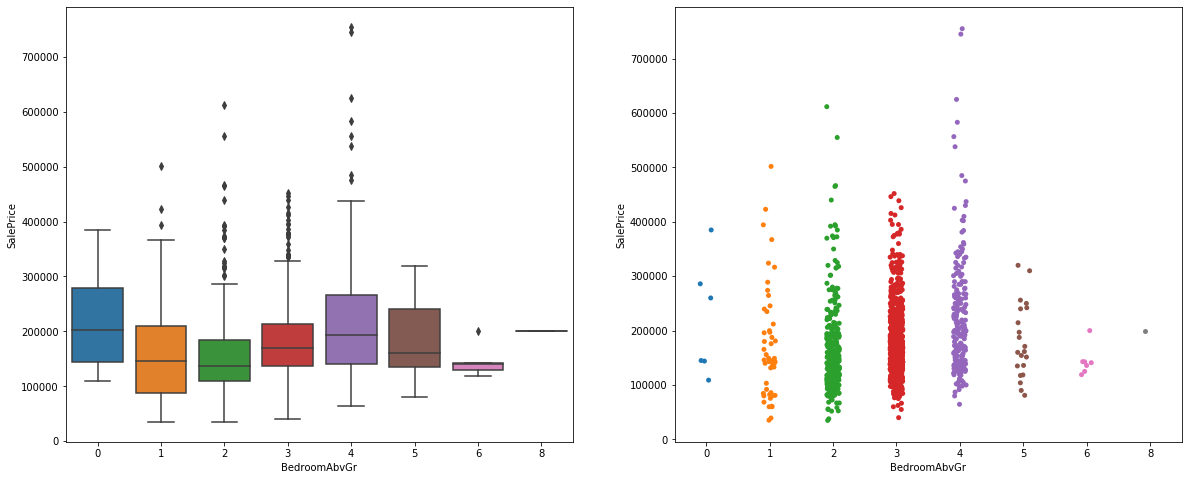

In [39]:
make_discrete_plot("BedroomAbvGr",0,0)

In [0]:
# there few values greater than 5, so let's put them together with 5
dataset.BedroomAbvGr = dataset.BedroomAbvGr.apply(lambda x: 5 if x > 5 else x)

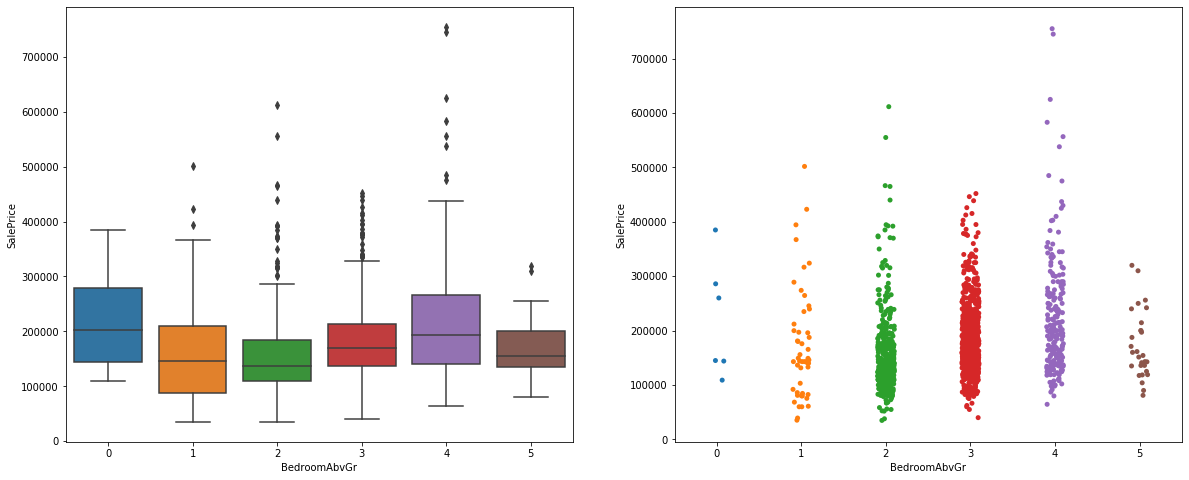

In [41]:
make_discrete_plot("BedroomAbvGr",0,0)

In [0]:
# change type to category
dataset.BedroomAbvGr = dataset.BedroomAbvGr.astype(str)

### KitchenAbvGr


---



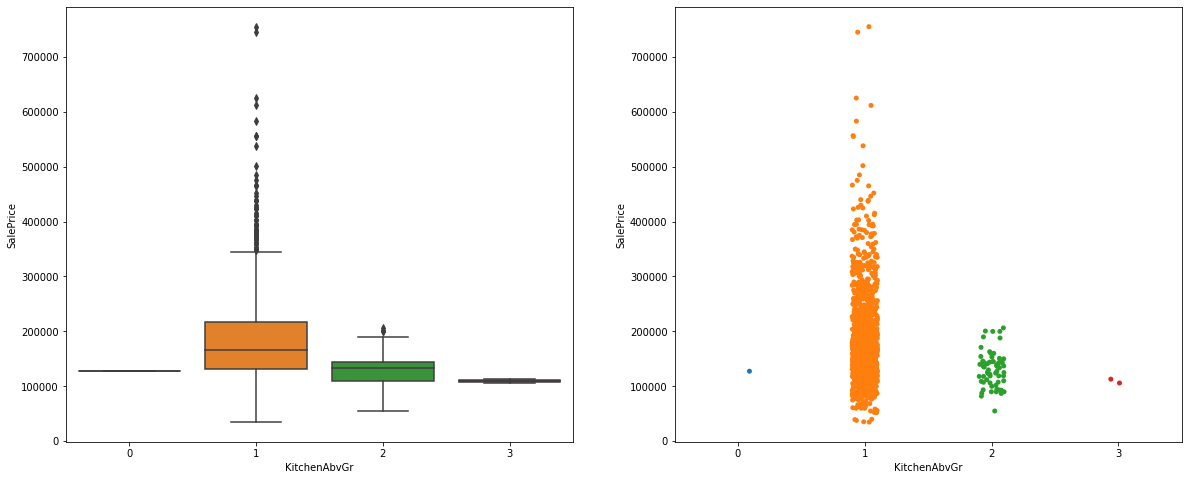

In [43]:
make_discrete_plot("KitchenAbvGr",0,0)

In [0]:
# there few values equal to 0 or 3, so let's put them together with other classes
dataset.KitchenAbvGr = dataset.KitchenAbvGr.apply(lambda x: 1 if x == 0 else(2 if x == 3 else x))

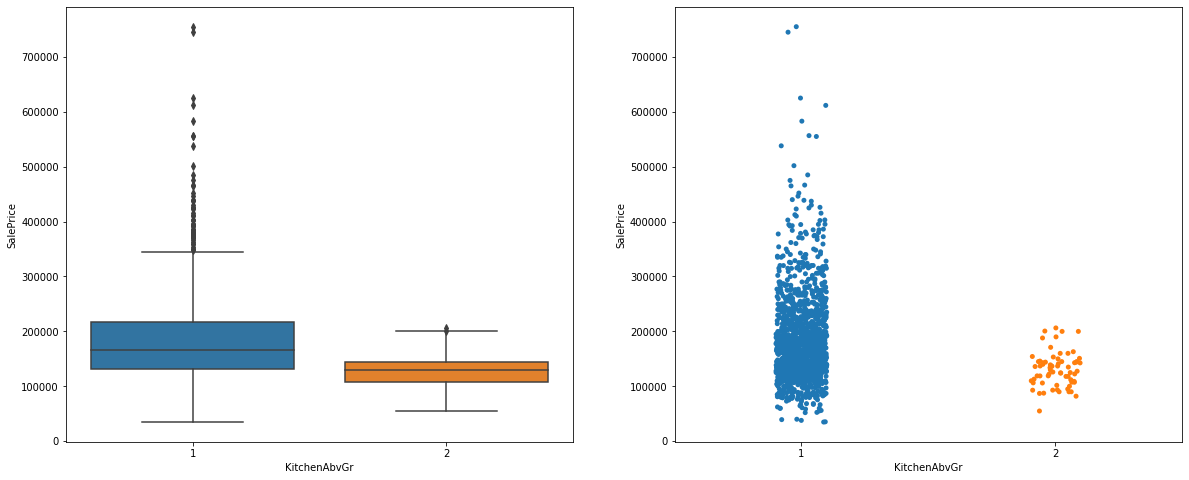

In [45]:
make_discrete_plot("KitchenAbvGr",0,0)

In [0]:
# change type to category
dataset.KitchenAbvGr = dataset.KitchenAbvGr.astype(str)

### TotRmsAbvGrd

> Total rooms above grade (does not include bathrooms).



---




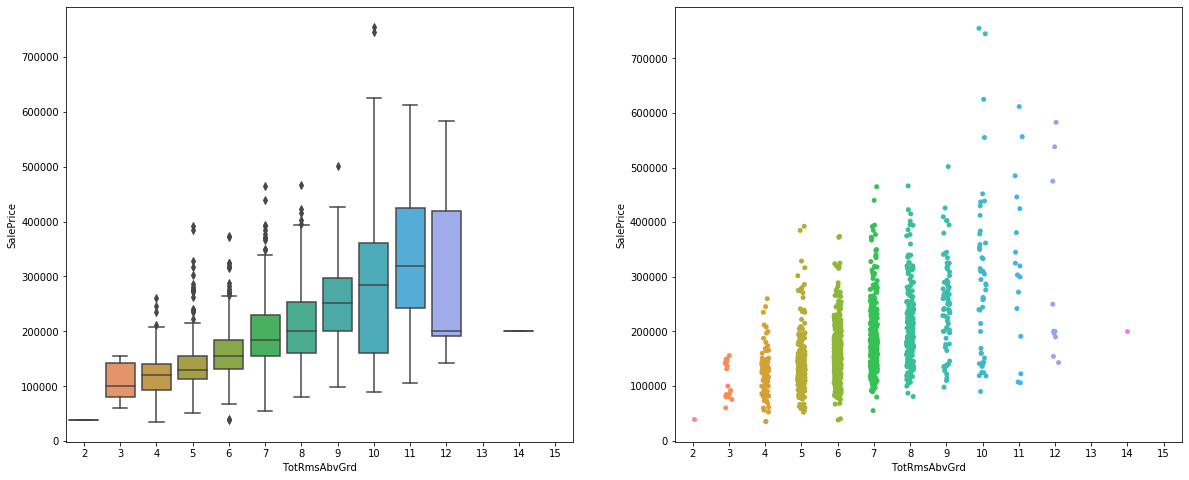

In [47]:


make_discrete_plot("TotRmsAbvGrd",0,0)

In [0]:
dataset.TotRmsAbvGrd = dataset.TotRmsAbvGrd.apply(lambda x: 3 if x == 2 else(11 if x>11 else x))

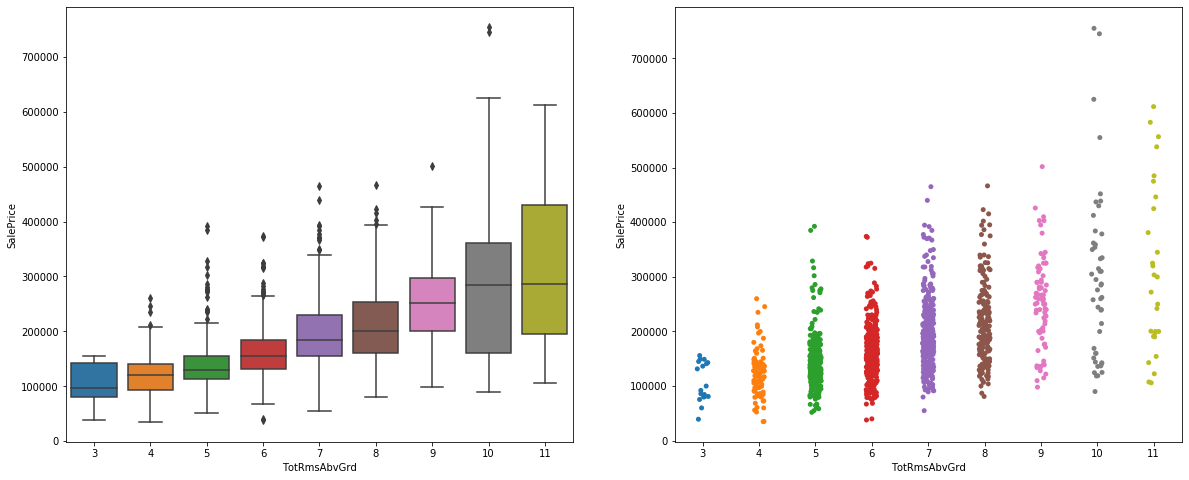

In [49]:
make_discrete_plot("TotRmsAbvGrd",0,0)

### Fireplaces


> Number of fireplaces.


---





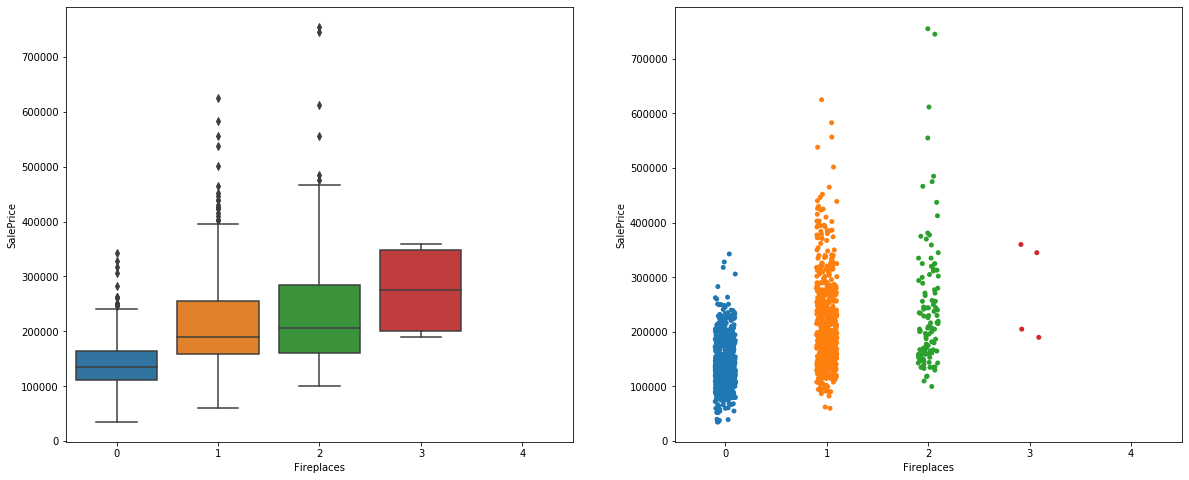

In [50]:
make_discrete_plot("Fireplaces",0,0)

In [0]:
# there few values greater than 2, so let's flag
dataset.Fireplaces = dataset.Fireplaces.apply(lambda x: 1 if x > 1 else x)

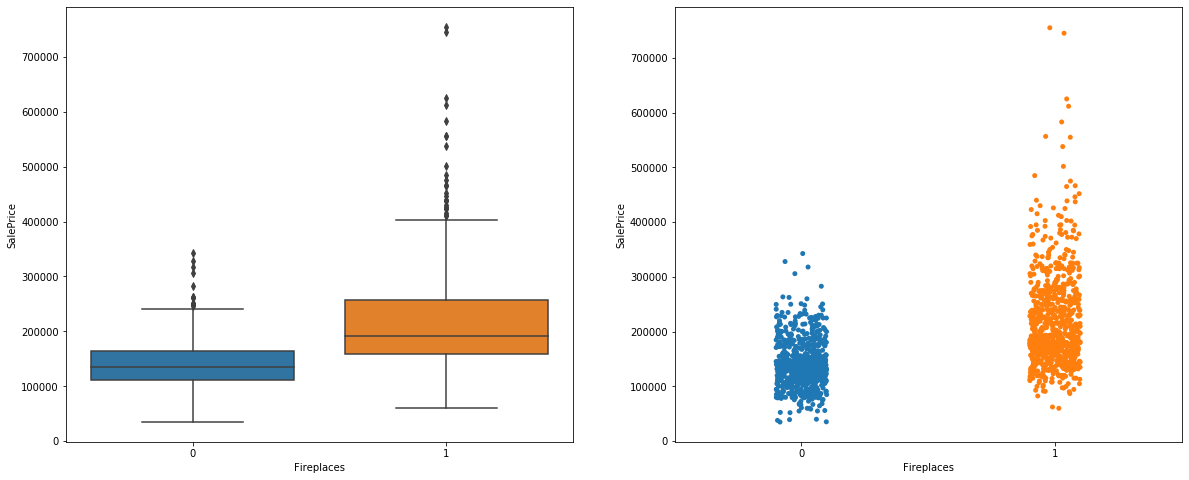

In [52]:
make_discrete_plot("Fireplaces",0,0)

### GarageCars

> Size of garage in car capacity.


---





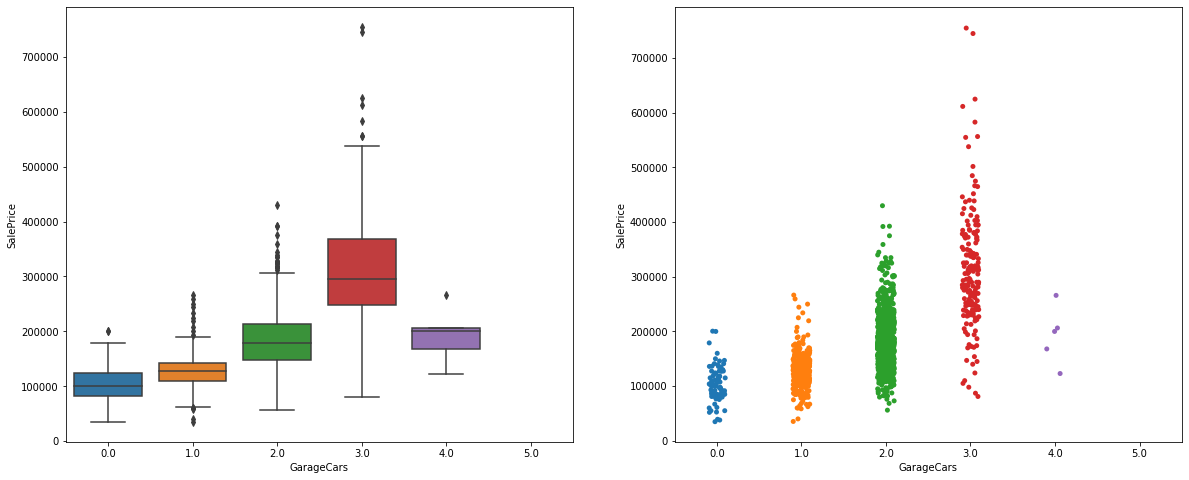

In [53]:
make_discrete_plot("GarageCars",0,0)

In [0]:
# there few values greater than 3, so let's put them together with other classes
dataset.GarageCars = dataset.GarageCars.apply(lambda x: 3 if x > 3 else x)

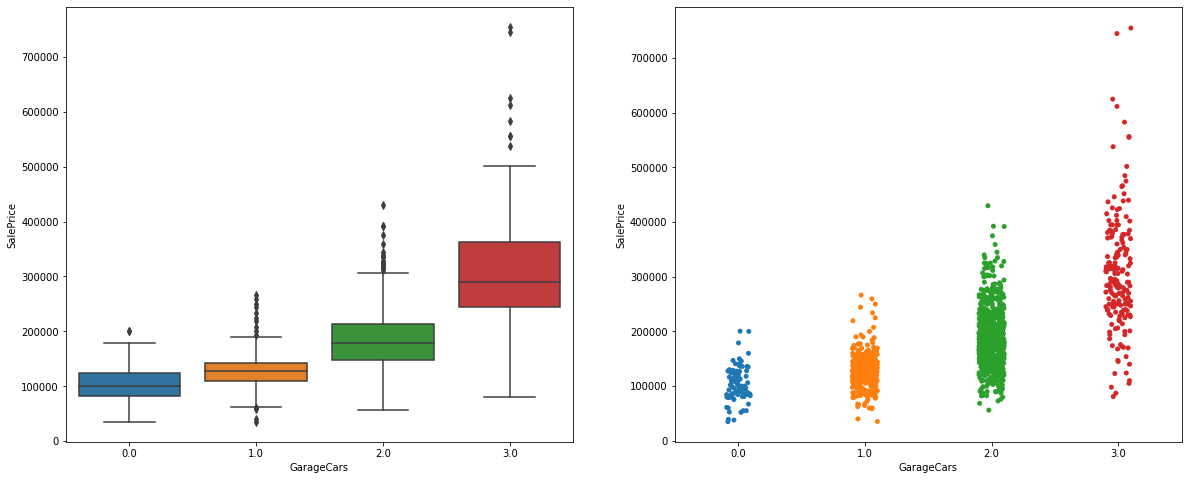

In [55]:
make_discrete_plot("GarageCars",0,0)

### GarageYrBlt

> Year garage was built.

---





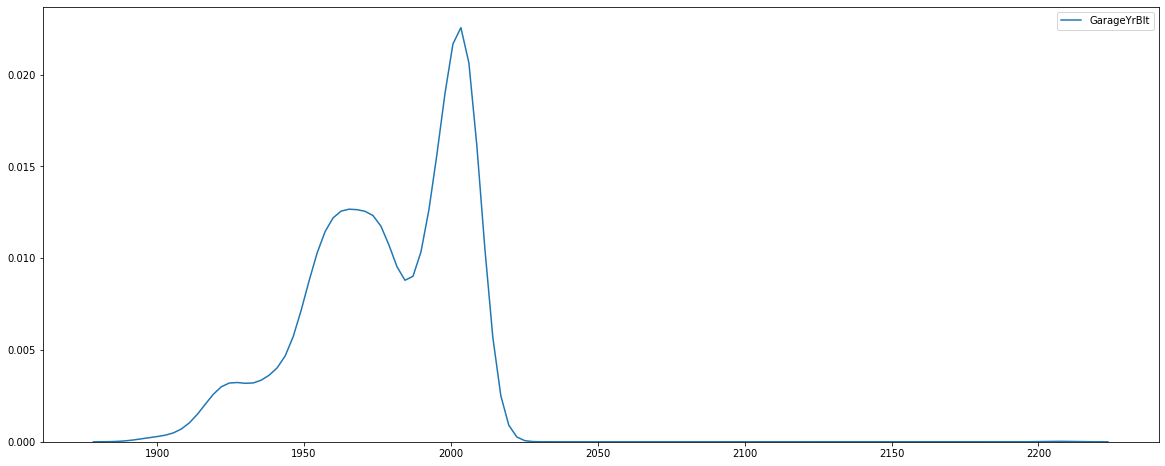

In [56]:
plt.figure(figsize=(20,8))
sns.kdeplot(dataset["GarageYrBlt"][dataset["GarageYrBlt"] != 'NA'])
plt.show()

In [57]:
dataset.GarageYrBlt[dataset["GarageYrBlt"] != 'NA'].sort_values(ascending= False).head(3) 
# this is strange, probably 2207 is 2007

2590    2207
1606    2010
1500    2010
Name: GarageYrBlt, dtype: object

In [58]:
dataset.GarageYrBlt[dataset.GarageYrBlt==2207] = 2007

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
# Let's transform those values into categories
min(dataset.GarageYrBlt[dataset["GarageYrBlt"] != 'NA'].values)

1895.0

In [60]:
bins = [1890, 1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2011]
names = ['-1920', '1920-1940', '1940-1950', '1950-1960', '1960-1970',
         '1970-1980', '1980-1990', '1990-2000', '2000+']

dataset.GarageYrBlt[dataset["GarageYrBlt"] != 'NA'] = pd.cut(dataset.GarageYrBlt[dataset["GarageYrBlt"] != 'NA'], 
                                                             bins, 
                                                             labels=names)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
# change type from category to str
dataset.GarageYrBlt = dataset.GarageYrBlt.astype(str)

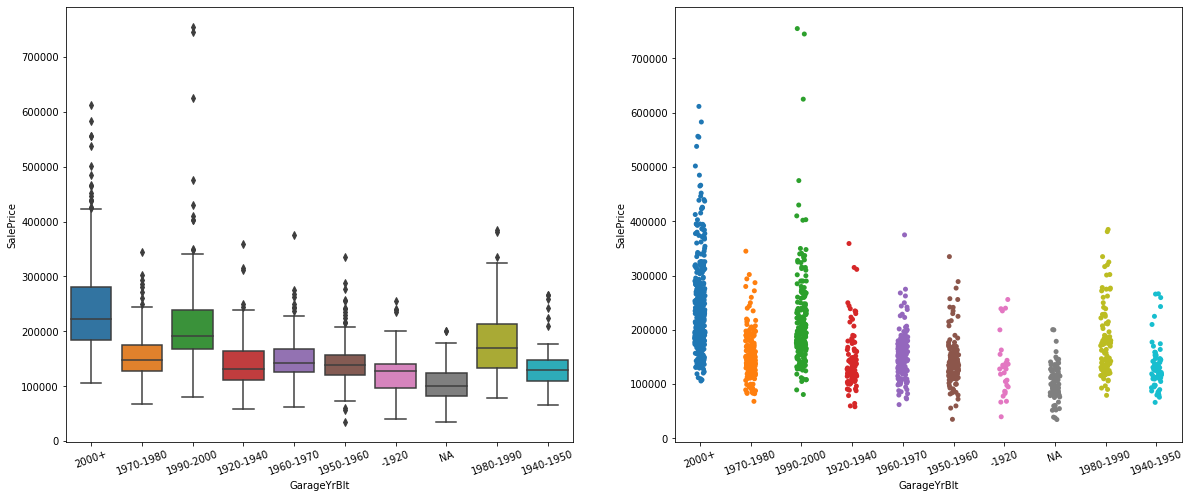

In [62]:
make_discrete_plot("GarageYrBlt",20,20)

### YearRemodAdd

> Remodel date (same as construction date if no remodeling or additions).

---





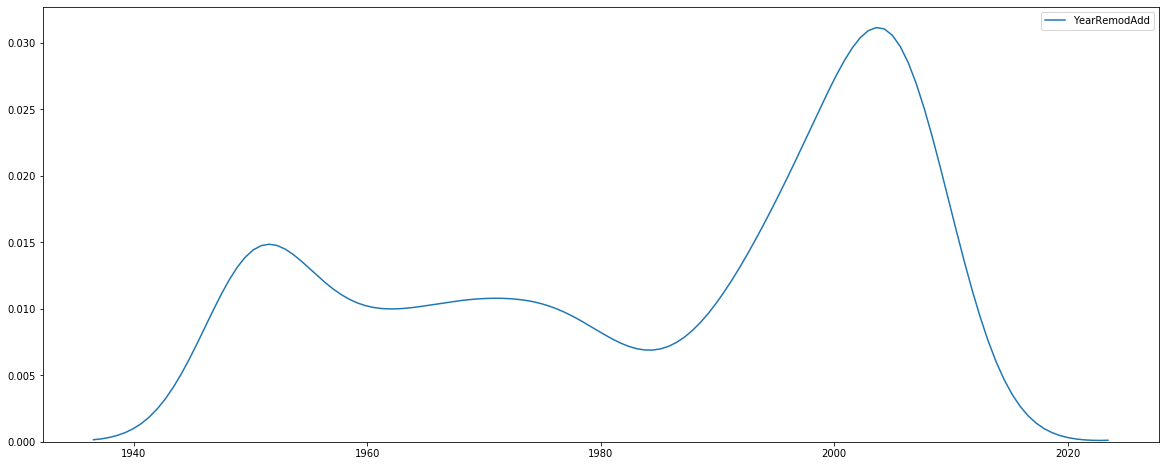

In [63]:
plt.figure(figsize=(20,8))
sns.kdeplot(dataset["YearRemodAdd"])
plt.show()

In [64]:
print(min(dataset.YearRemodAdd[dataset["YearRemodAdd"] != 'NA'].values), ',', max(dataset.YearRemodAdd[dataset["YearRemodAdd"] != 'NA'].values))

1950 , 2010


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
bins = [1949, 1960, 1970, 1980, 1990, 2000, 2011]
names = ['1950-1960', '1960-1970',
         '1970-1980', '1980-1990', '1990-2000', '2000+']

dataset.YearRemodAdd = pd.cut(dataset.YearRemodAdd, bins, labels=names)

In [0]:
# change type from category to str
dataset.YearRemodAdd = dataset.YearRemodAdd.astype(str)

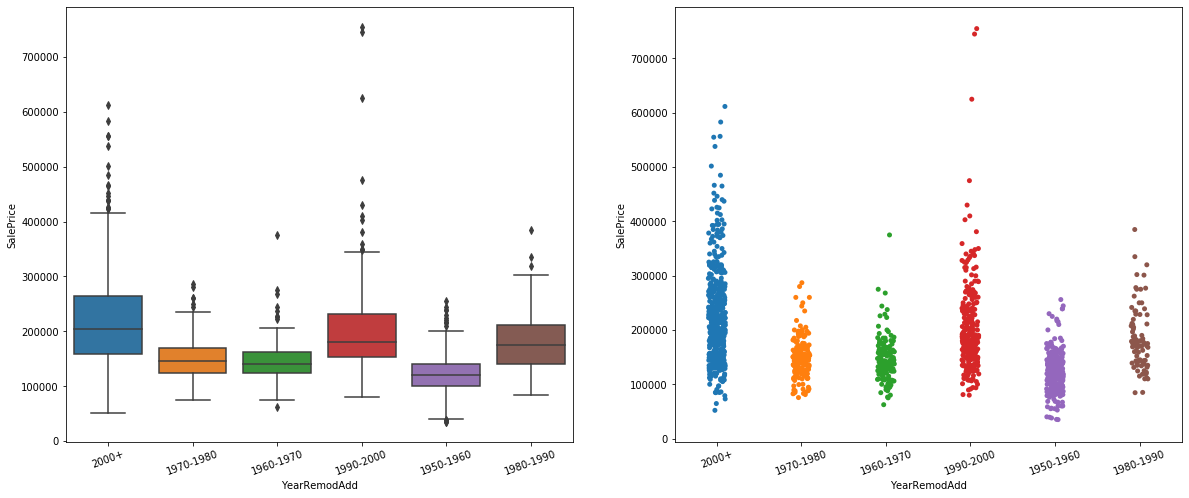

In [67]:
make_discrete_plot("YearRemodAdd",20,20)

### YearBuilt


> Original construction date.

---





/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


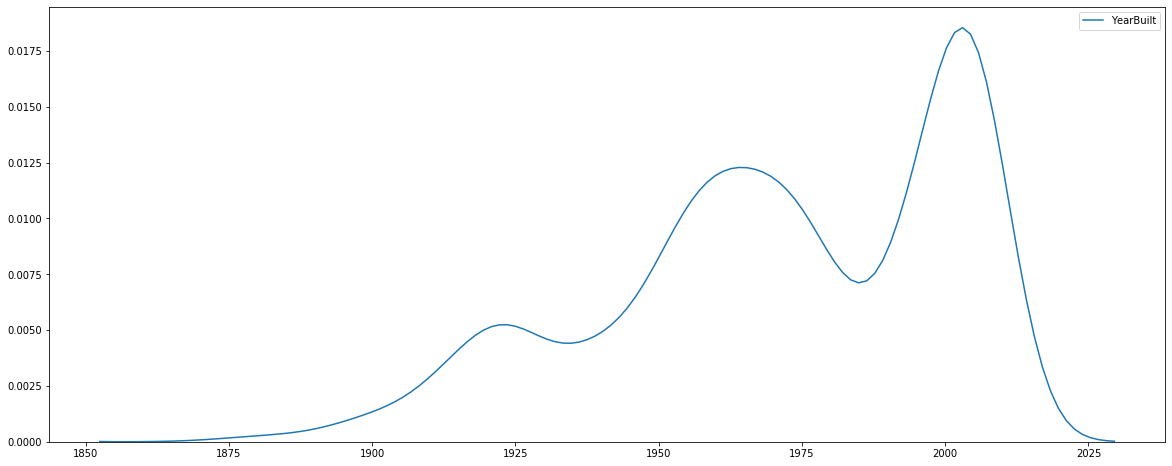

In [68]:
plt.figure(figsize=(20,8))
sns.kdeplot(dataset["YearBuilt"][dataset["YearBuilt"] != 'NA'])
plt.show()

In [69]:
# Let's transform those values into categories
print(min(dataset.YearBuilt[dataset["YearBuilt"] != 'NA'].values), ',',
      max(dataset.YearBuilt[dataset["YearBuilt"] != 'NA'].values))

1872 , 2010


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
bins = [1870, 1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2011]
names = ['-1920', '1920-1940', '1940-1950', '1950-1960', '1960-1970',
         '1970-1980', '1980-1990', '1990-2000', '2000+']

dataset.YearBuilt = pd.cut(dataset.YearBuilt, bins, labels=names)

In [0]:
# change type from category to str
dataset.YearBuilt = dataset.YearBuilt.astype(str)

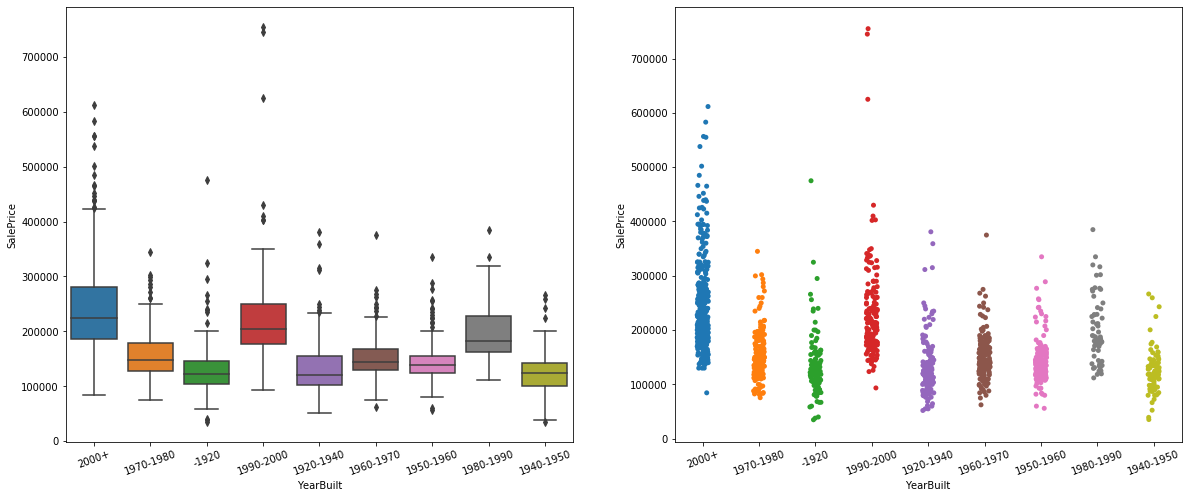

In [72]:
make_discrete_plot("YearBuilt",20,20)

### YrSold

> Year Sold (YYYY).
---





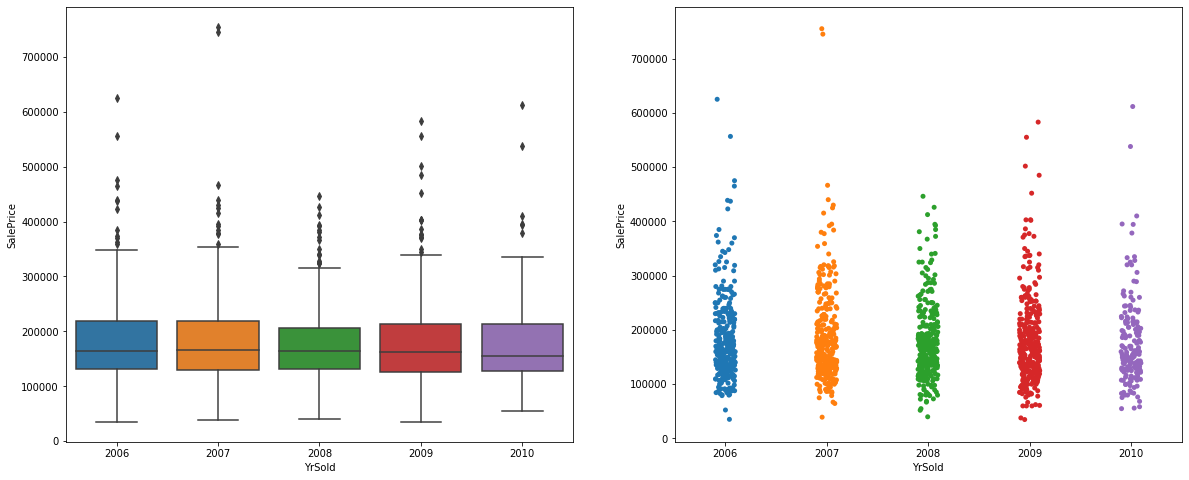

In [73]:
make_discrete_plot("YrSold",0,0)

In [0]:
# change type from int to str
dataset.YrSold = dataset.YrSold.astype(str)

### MoSold

> Month Sold (MM).

---





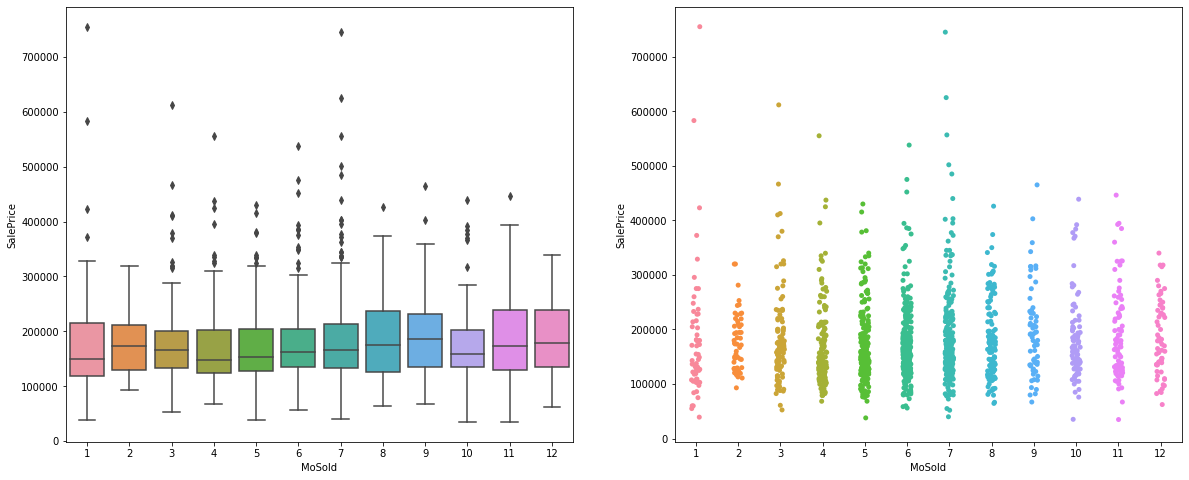

In [75]:
make_discrete_plot("MoSold",0,0)

In [0]:
# change type from int to str
dataset.MoSold = dataset.MoSold.astype(str)

## **Continuous Variables**

> Here we are going to analyze correlation of each feature with SalePrice, see skewness for linear and boxcox transformations (with different lambdas) e apply the better one. If skewness continues high, we will bin the variable into categories or flag (0 and 1). And if there are missing values, we will drop the column.

---





In [0]:
# to remember
num_continuous = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                  '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [0]:
# defining function to plot scatterplot for continuous variables with SalePrice.
def make_continuous_plot(feature):
    
    fig = plt.figure(figsize=(18,15))
    gs = GridSpec(2,2)
    
    j = sns.scatterplot(y=np.log1p(dataset['SalePrice']), 
                        x=boxcox1p(dataset[feature], 0.15), ax=fig.add_subplot(gs[0,1]), palette = 'blue')

    plt.title('BoxCox 0.15\n' + 'Corr: ' + str(np.round(np.log1p(dataset['SalePrice']).corr(boxcox1p(dataset[feature], 0.15)),2)) + ', Skew: ' +
               str(np.round(stats.skew(boxcox1p(dataset[feature], 0.15)),2)))
    
    j = sns.scatterplot(y=np.log1p(dataset['SalePrice']), 
                        x=boxcox1p(dataset[feature], 0.25), ax=fig.add_subplot(gs[1,0]), palette = 'blue')

    plt.title('BoxCox 0.25\n' + 'Corr: ' + str(np.round(np.log1p(dataset['SalePrice']).corr(boxcox1p(dataset[feature], 0.25)),2)) + ', Skew: ' +
               str(np.round(stats.skew(boxcox1p(dataset[feature], 0.25)),2)))
    
    j = sns.scatterplot(y=np.log1p(dataset['SalePrice']), 
                        x=boxcox1p(dataset[feature], 0.35), ax=fig.add_subplot(gs[1,1]), palette = 'blue')

    plt.title('BoxCox 0.35\n' + 'Corr: ' + str(np.round(np.log1p(dataset['SalePrice']).corr(boxcox1p(dataset[feature], 0.35)),2)) + ', Skew: ' +
               str(np.round(stats.skew(boxcox1p(dataset[feature], 0.35)),2)))
    
    j = sns.scatterplot(y=np.log1p(dataset['SalePrice']), 
                        x=dataset[feature], ax=fig.add_subplot(gs[0,0]), color = 'red')

    plt.title('Linear\n' + 'Corr: ' + str(np.round(np.log1p(dataset['SalePrice']).corr(dataset[feature]),2)) + ', Skew: ' + 
               str(np.round(stats.skew(dataset[feature]),2)))
    
    fig.show()

### LotFrontage


> Linear feet of street connected to property.



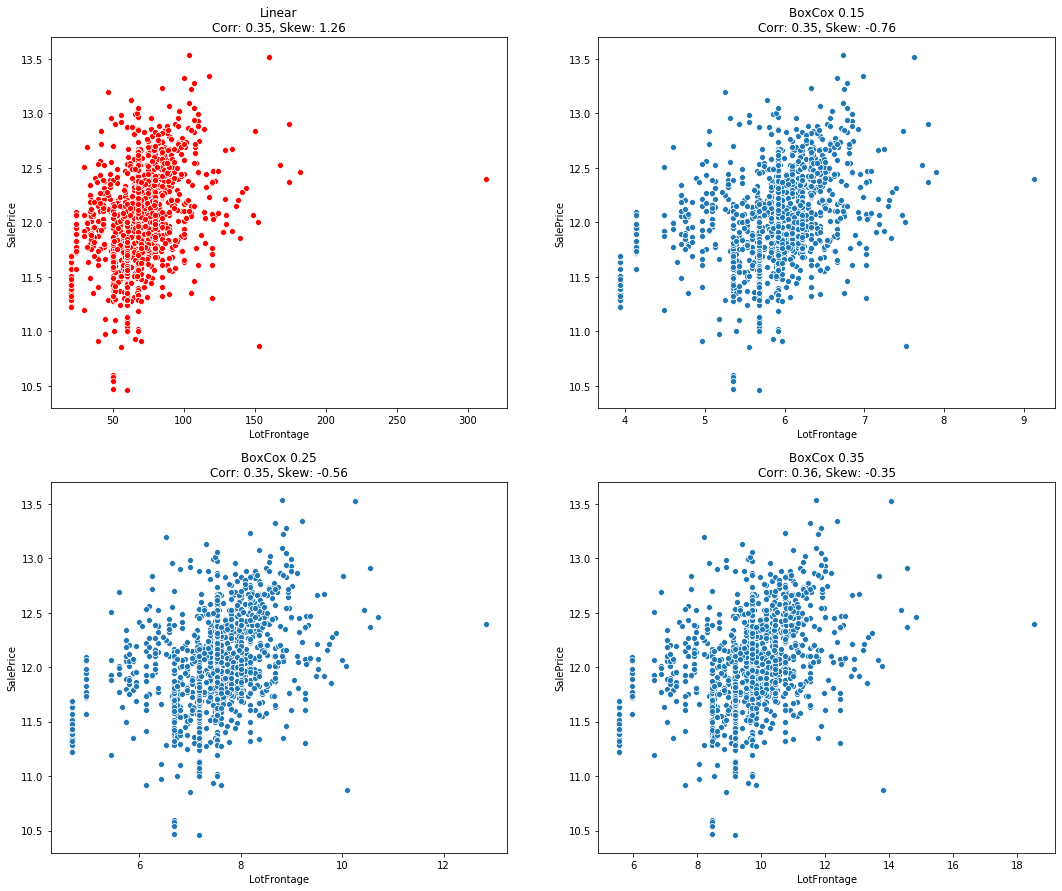

In [79]:
make_continuous_plot('LotFrontage')

In [0]:
dataset.LotFrontage = boxcox1p(dataset.LotFrontage, 0.35)


### LotArea


> Area of the Lot.

---





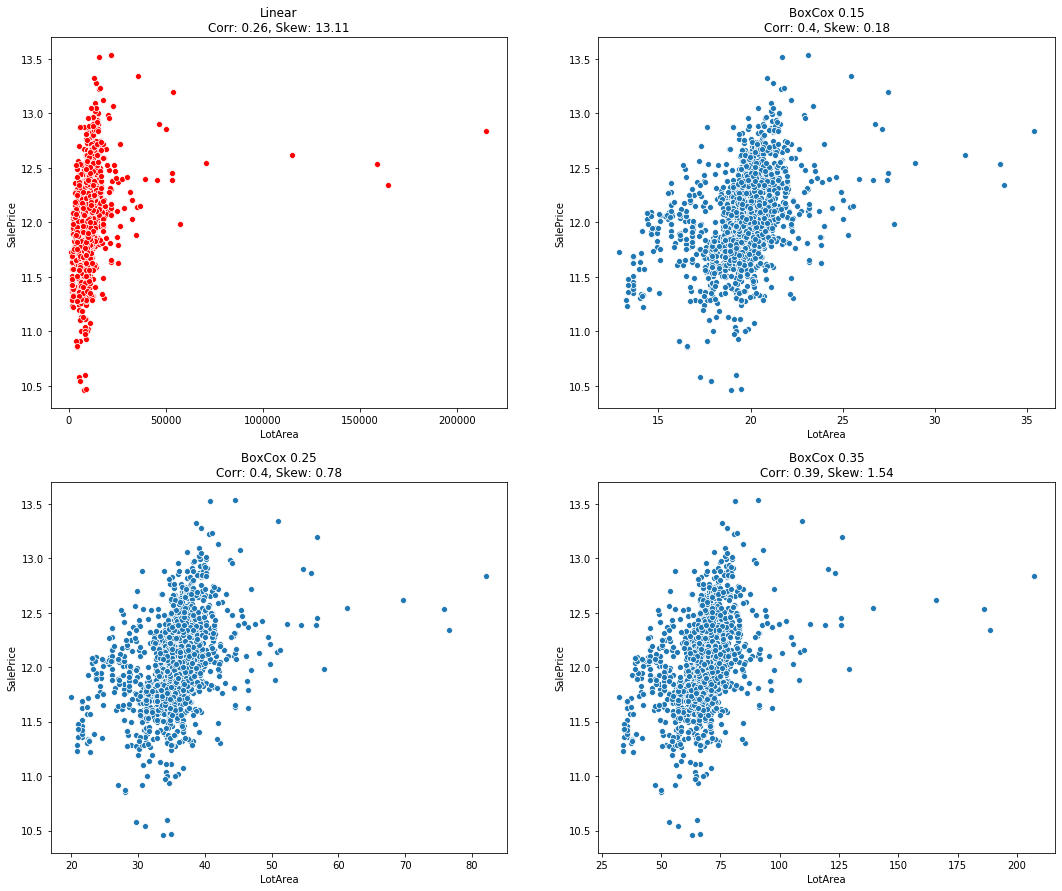

In [81]:
make_continuous_plot('LotArea')

In [0]:
dataset.LotArea = boxcox1p(dataset.LotArea, 0.15)

### MasVnrArea


> Masonry veneer area in square feet.

---





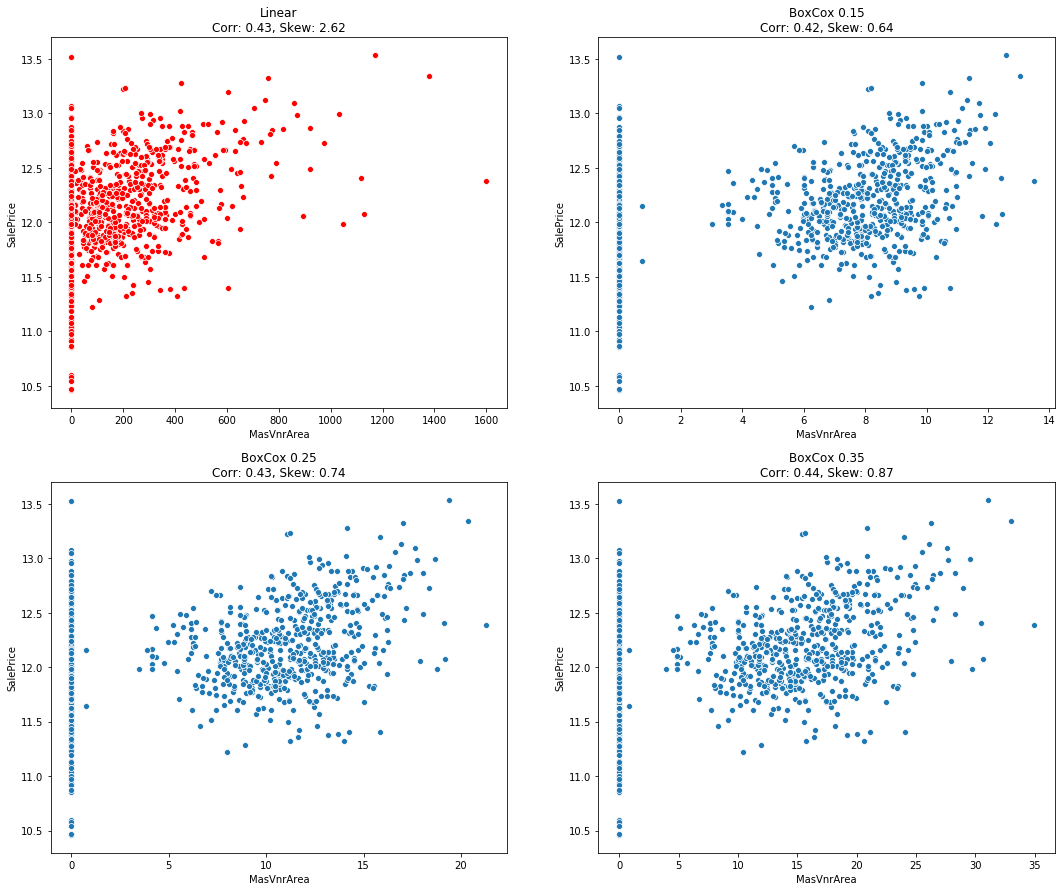

In [83]:
make_continuous_plot('MasVnrArea')


In [0]:
dataset.MasVnrArea = boxcox1p(dataset.MasVnrArea, 0.15)

### BsmtFinSF1 and BsmtFinSF2

> Types 1 and 2 finished square feet.

---





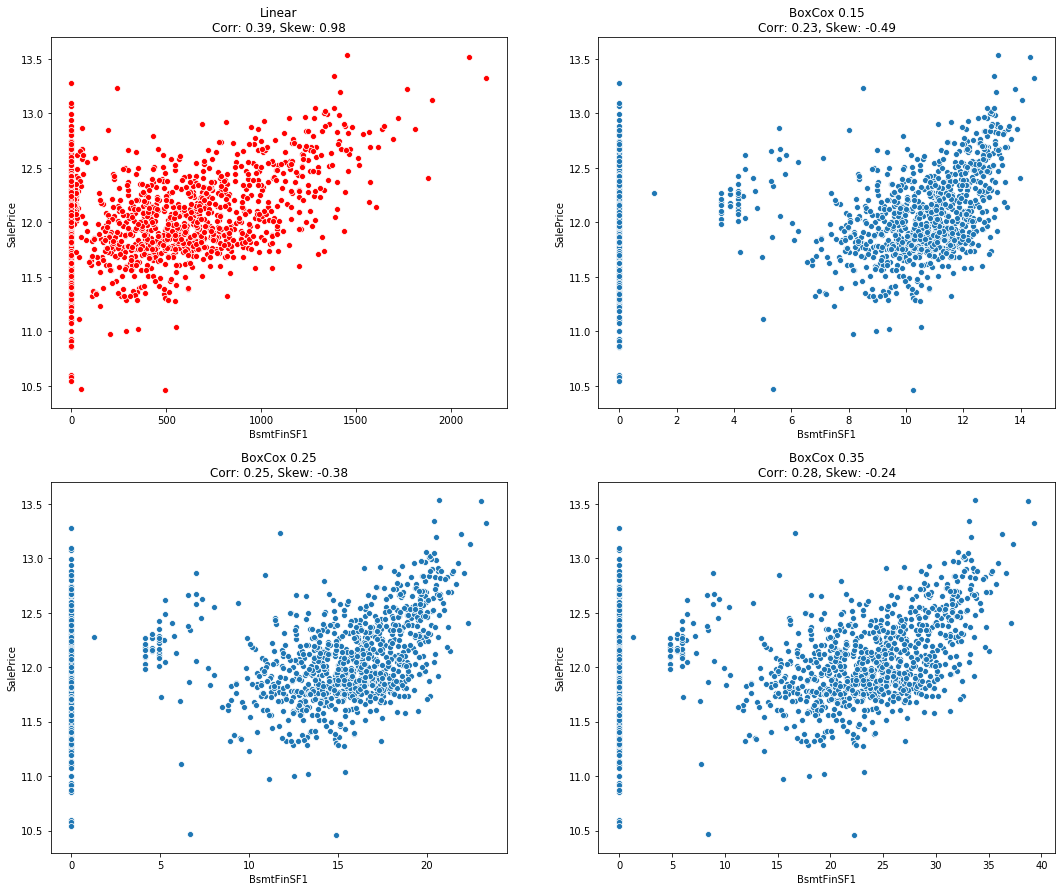

In [85]:
make_continuous_plot('BsmtFinSF1')


In [86]:
# Let's transform those values into categories, because with boxcox 0.35 the correlation decreases a lot
print(min(dataset.BsmtFinSF1.values), ',',
      max(dataset.BsmtFinSF1.values))

0.0 , 4010.0


In [0]:
bins = [-1, 250, 500, 750, 1000, 1250, 4011]
names = ['-250', '250-500', '500-750', '750-1000',
         '1000-1250', '1250-4011']

dataset.BsmtFinSF1 = pd.cut(dataset.BsmtFinSF1, bins, labels=names)

In [0]:
# change type from category to str
dataset.BsmtFinSF1 = dataset.BsmtFinSF1.astype(str)

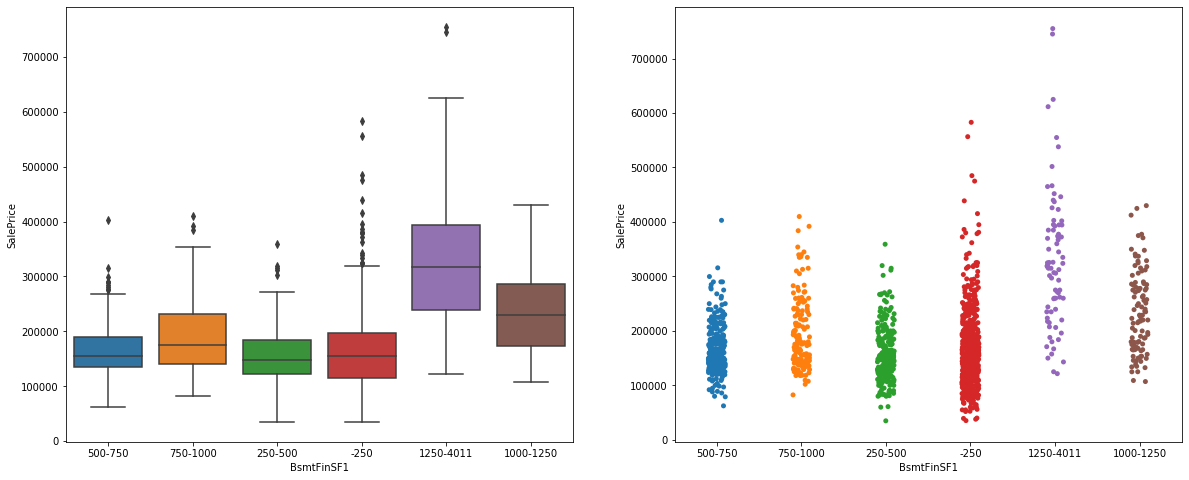

In [89]:
make_discrete_plot('BsmtFinSF1',0,0)

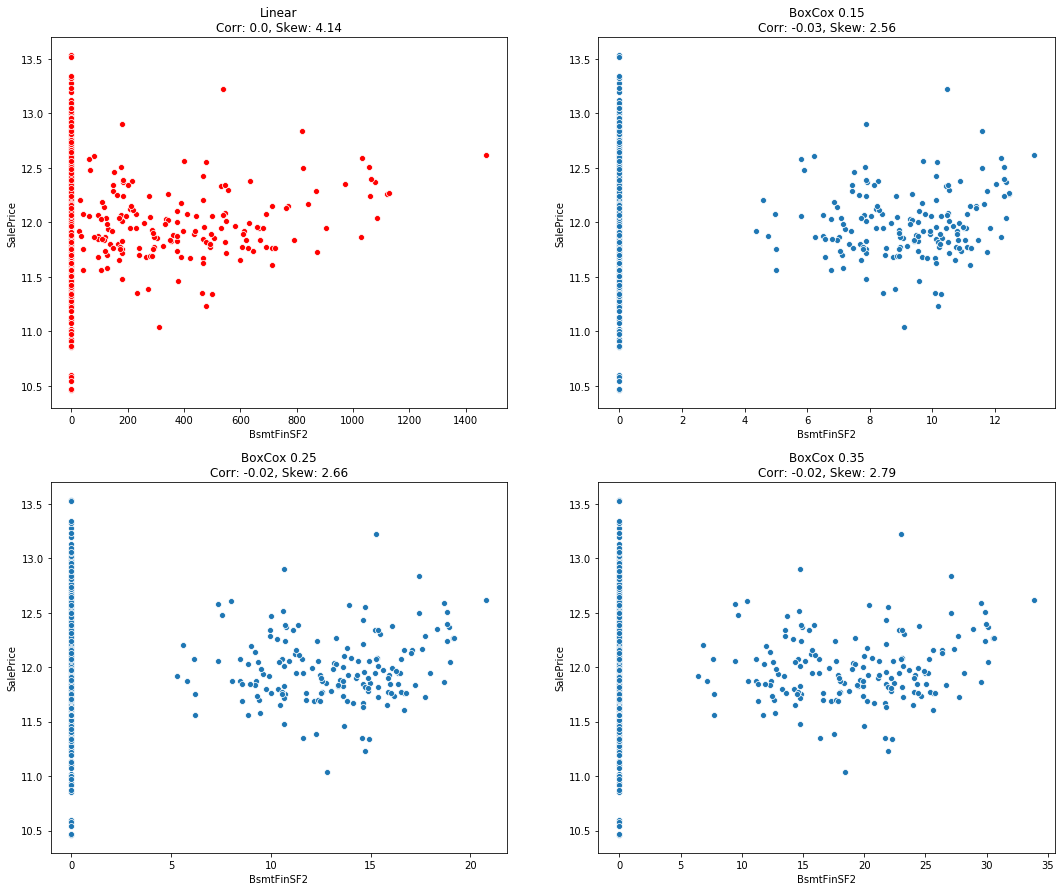

In [90]:
make_continuous_plot('BsmtFinSF2')

In [0]:
# since there is no correlation at all, I'll flag this feature.
dataset.BsmtFinSF2 = dataset.BsmtFinSF2.apply(lambda x: 1 if x > 0 else 0)

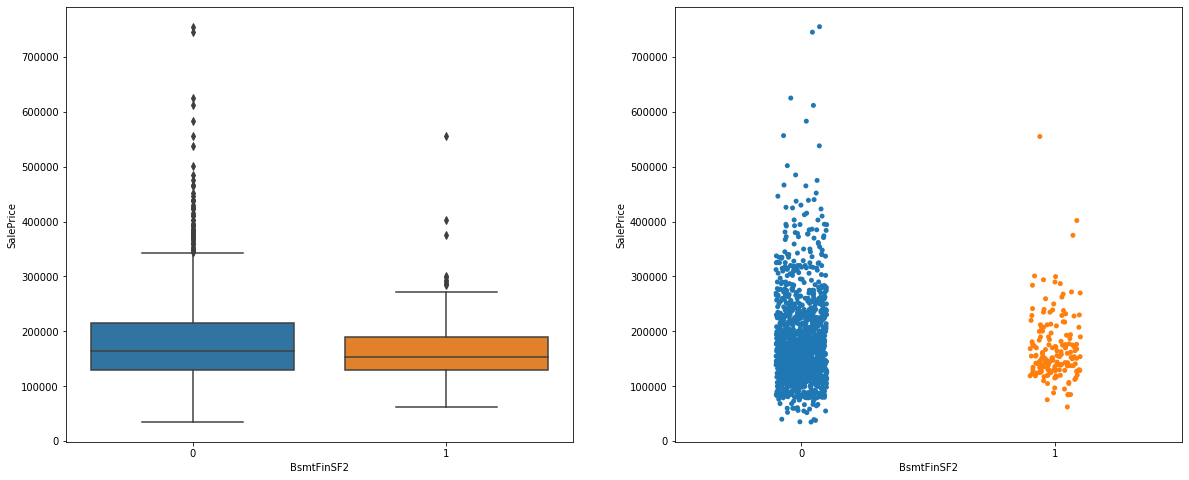

In [92]:
make_discrete_plot('BsmtFinSF2',0,0)

### BsmtUnfSF

> Unfinished square feet of basement area.
---





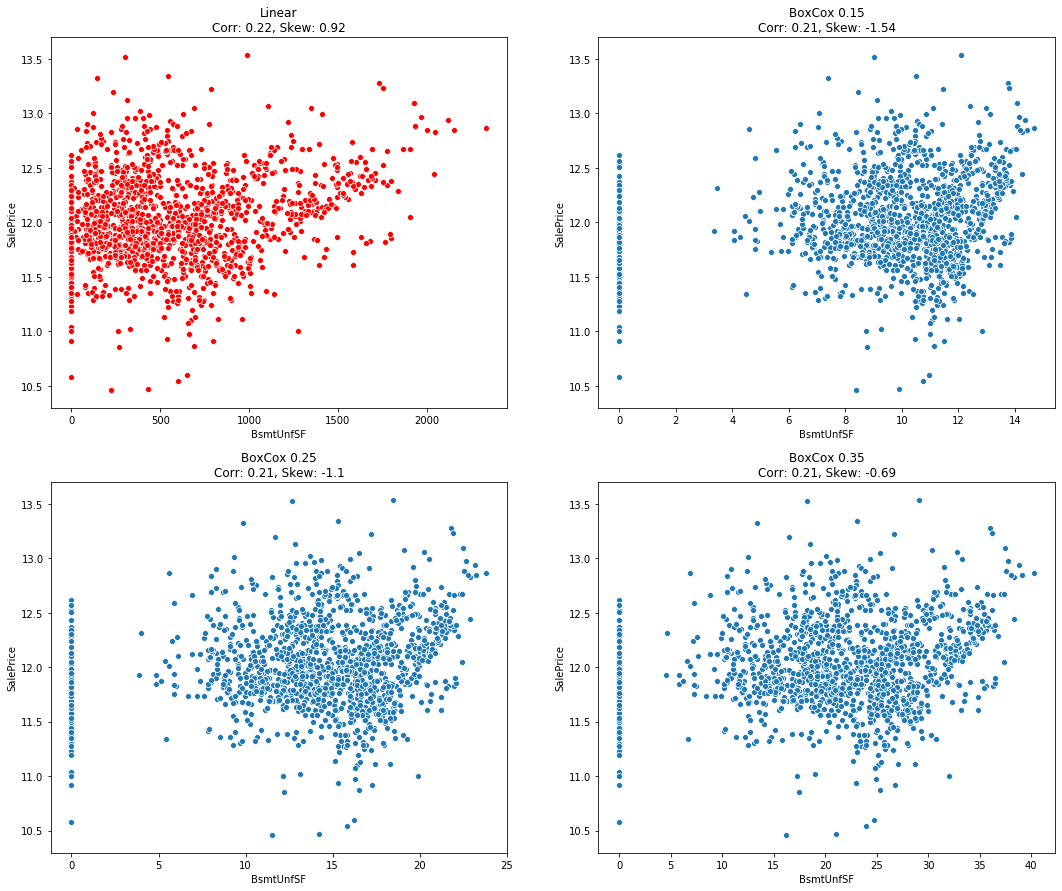

In [93]:
make_continuous_plot('BsmtUnfSF')

In [94]:
# Let's transform those values into categories
print(min(dataset.BsmtUnfSF.values), ',',
      max(dataset.BsmtUnfSF.values))

0.0 , 2336.0


In [0]:
bins = [-1, 250, 500, 750, 1000, 1250, 2400]
names = ['-250', '250-500', '500-750', '750-1000',
         '1000-1250', '1250-2400']

dataset.BsmtUnfSF = pd.cut(dataset.BsmtUnfSF, bins, labels=names)

In [0]:
# change type from category to str
dataset.BsmtUnfSF = dataset.BsmtUnfSF.astype(str)

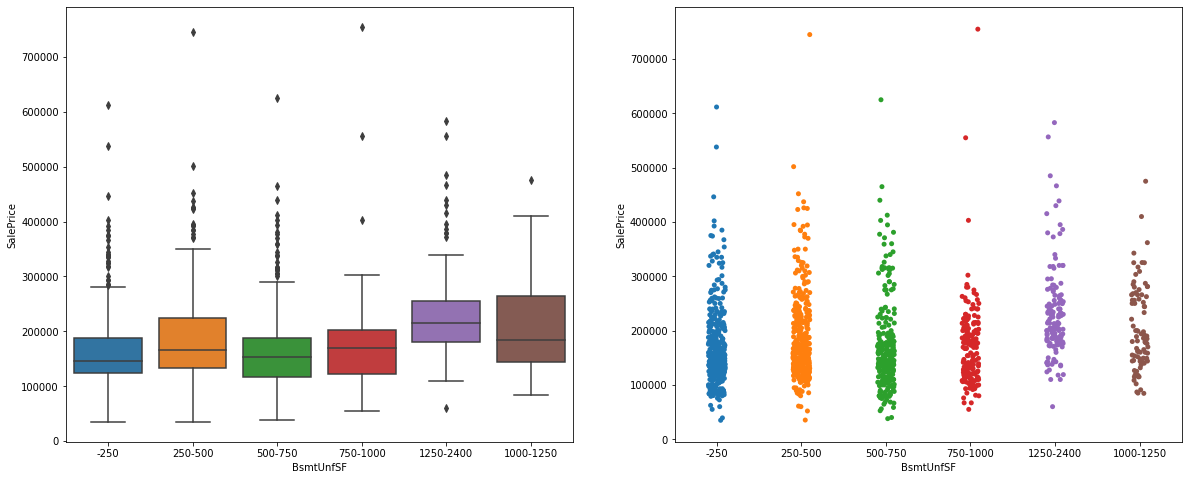

In [97]:
make_discrete_plot('BsmtUnfSF',0,0)


### LotConfig


> Lot configuration

---



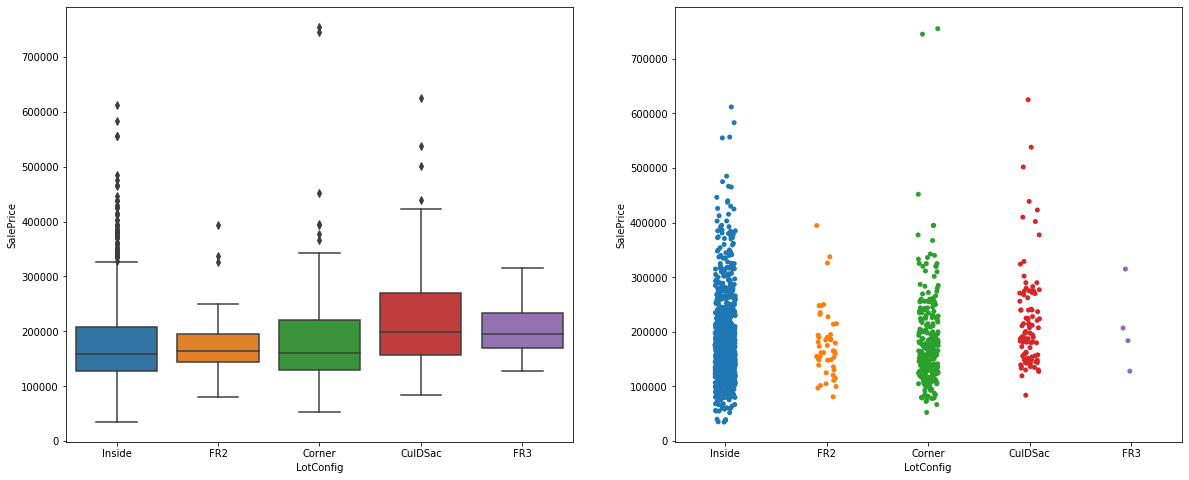

In [98]:
make_discrete_plot('LotConfig',0,0)

In [0]:
# few values = FR3, so I'll decide to put together with FR2
dataset.LotConfig = dataset.LotConfig.apply(lambda x: 'FR2' if x == 'FR3' else x)

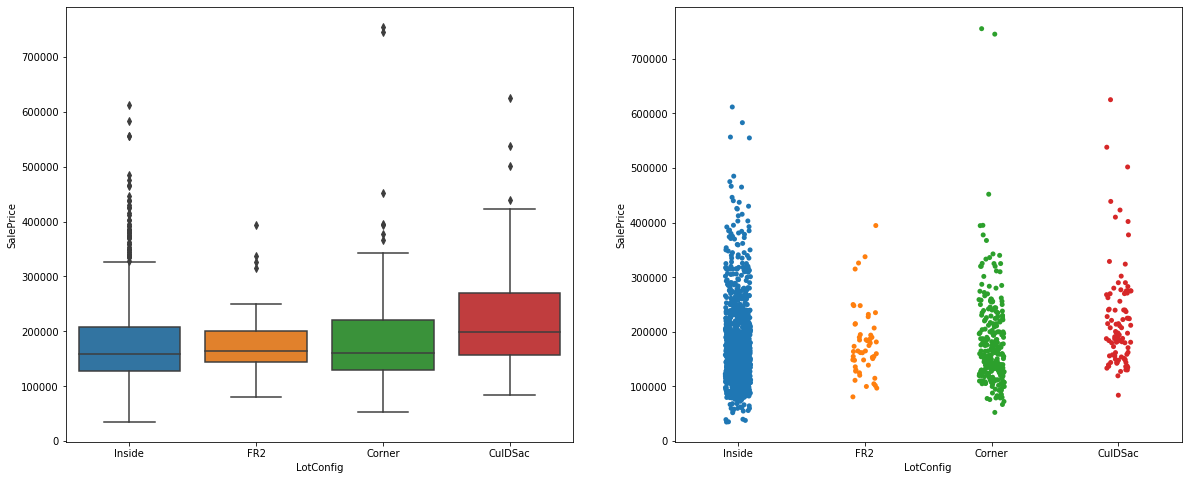

In [100]:
make_discrete_plot('LotConfig',0,0)

### Neighborhood

> Physical locations within Ames city limits.

---



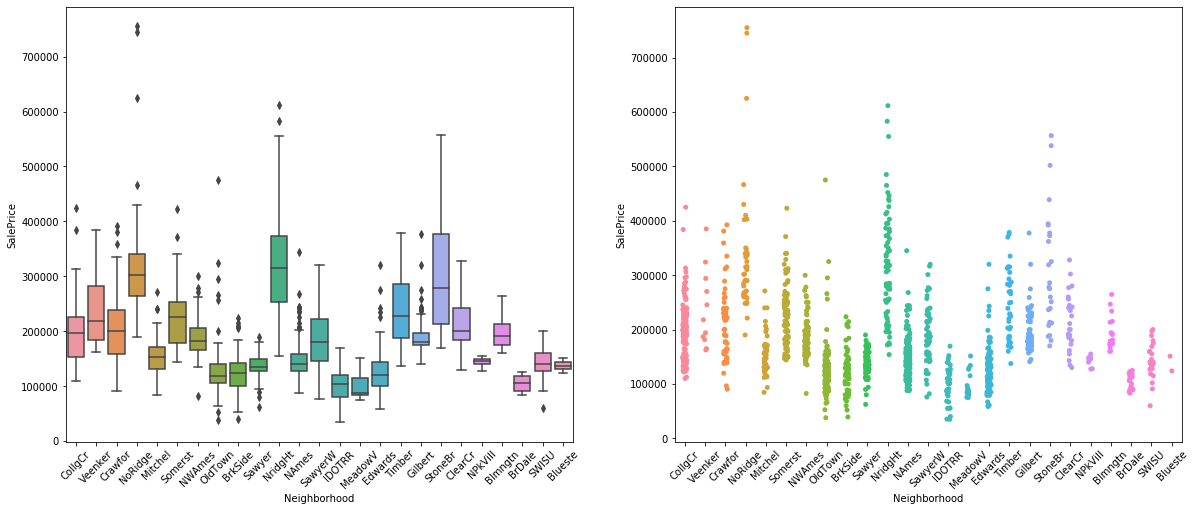

In [101]:
make_discrete_plot('Neighborhood',45,45)

### Condition1

> Proximity to main road or railroad.

---





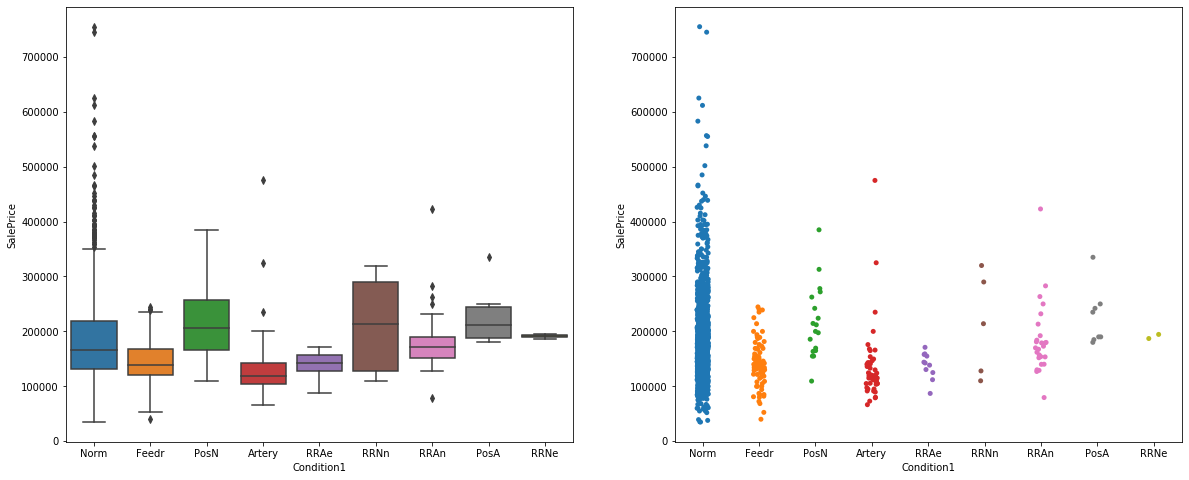

In [102]:
make_discrete_plot('Condition1',0,0)

### Condition2


> Proximity to main road or railroad (if a second is present).

---





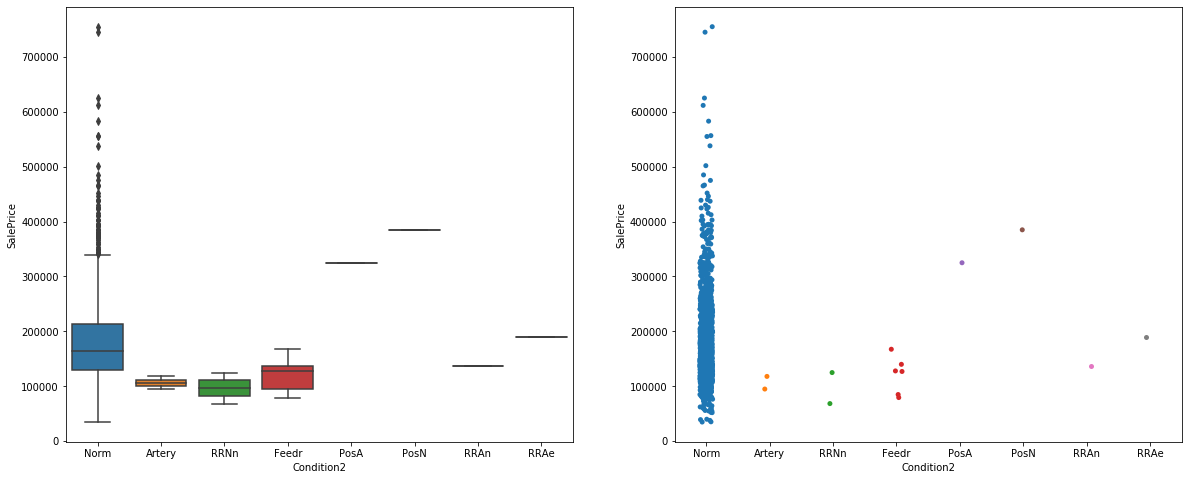

In [103]:
make_discrete_plot('Condition2',0,0)


In [0]:
# most of the values are in Norm
dataset = dataset.drop(columns='Condition2')

### BldgType

> Type of dwelling.

---





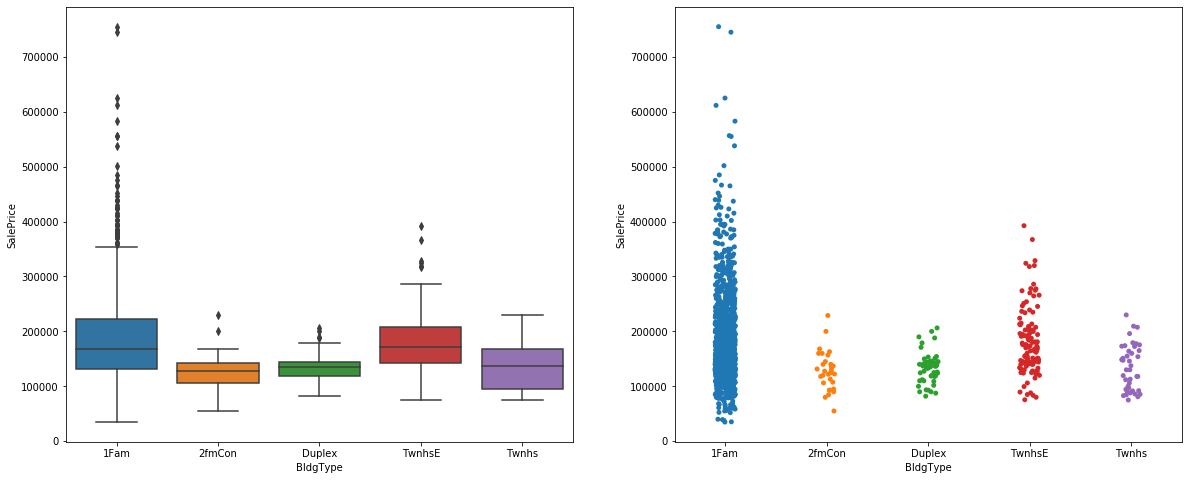

In [105]:
make_discrete_plot('BldgType',0,0)

### HouseStyle

> Style of dwelling.

---





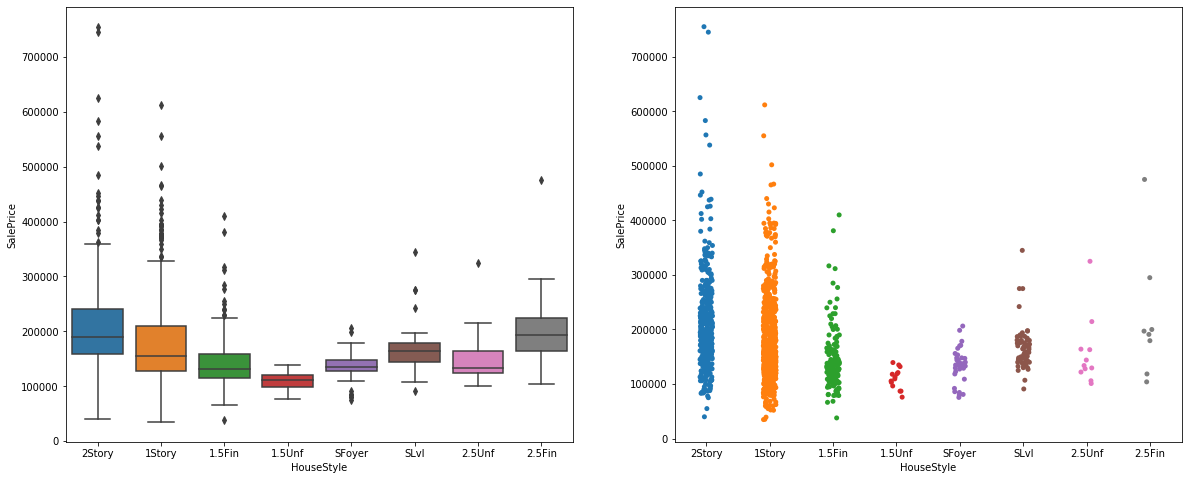

In [106]:
make_discrete_plot('HouseStyle',0,0)

### RoofStyle

> Type of roof.

---





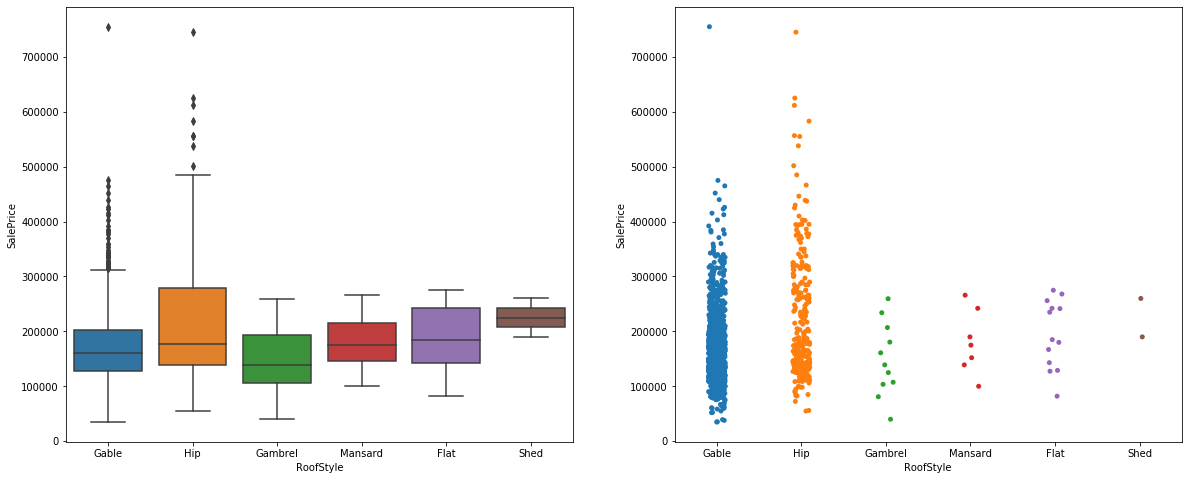

In [107]:
make_discrete_plot('RoofStyle',0,0)

In [0]:
# few values from Gambrel to Shed, so I'll decide to put together = Other
dataset.RoofStyle = dataset.RoofStyle.apply(lambda x: 'Other' if (x == 'Gambrel' or x == 'Mansard' or x == 'Flat' or x == 'Shed') else x)

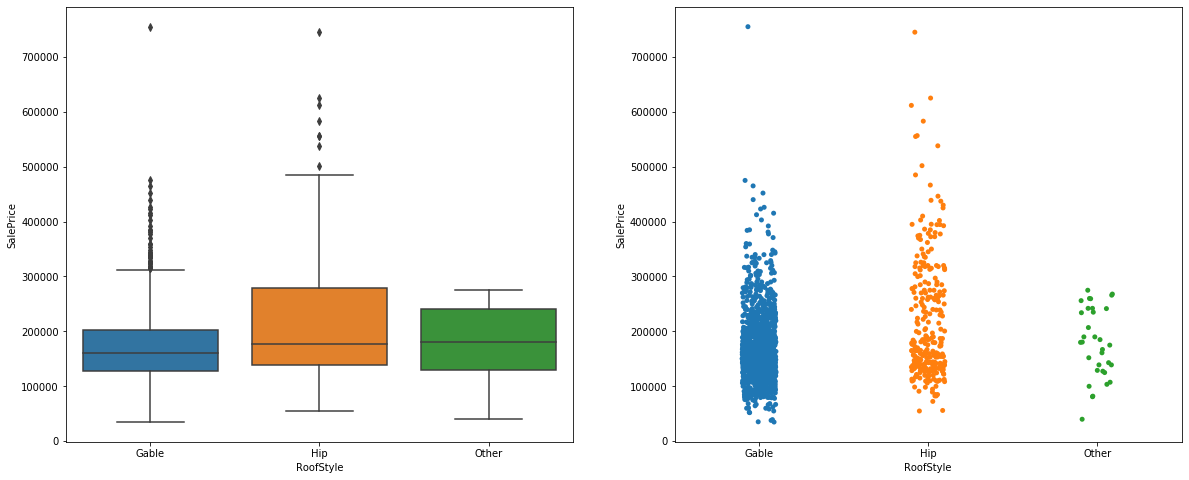

In [109]:
make_discrete_plot('RoofStyle',0,0)

### RoofMatl


> Roof material.

---





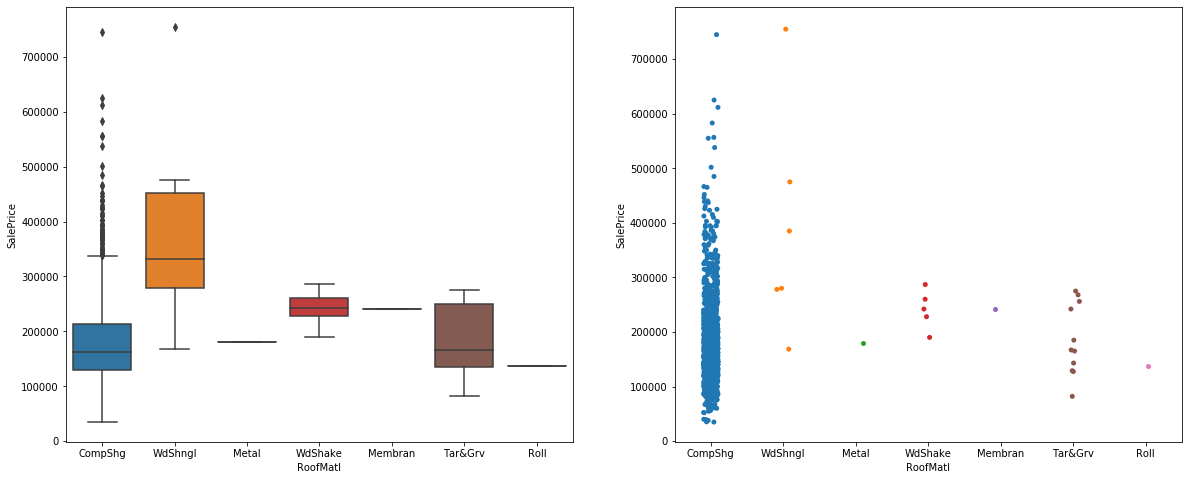

In [110]:
make_discrete_plot('RoofMatl',0,0)

In [0]:
# most of the values are in CompShg, let's drop it
dataset = dataset.drop(columns='RoofMatl')

### Exterior1st

> Exterior covering on house.
---





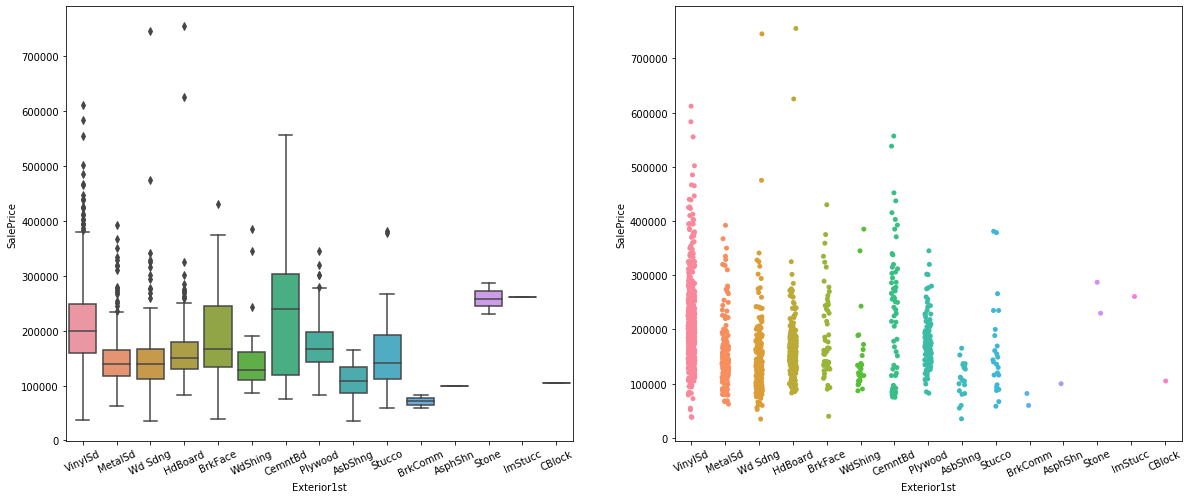

In [112]:
make_discrete_plot('Exterior1st',25,25)

In [0]:
# few values from BrkComm to CBlock, so I'll decide to put together = Other
dataset.Exterior1st = dataset.Exterior1st.apply(lambda x: 'Other' if (x == 'BrkComm' or x == 'AsphShn' or x == 'Stone' or x == 'ImStucc' or x== 'CBlock') else x)

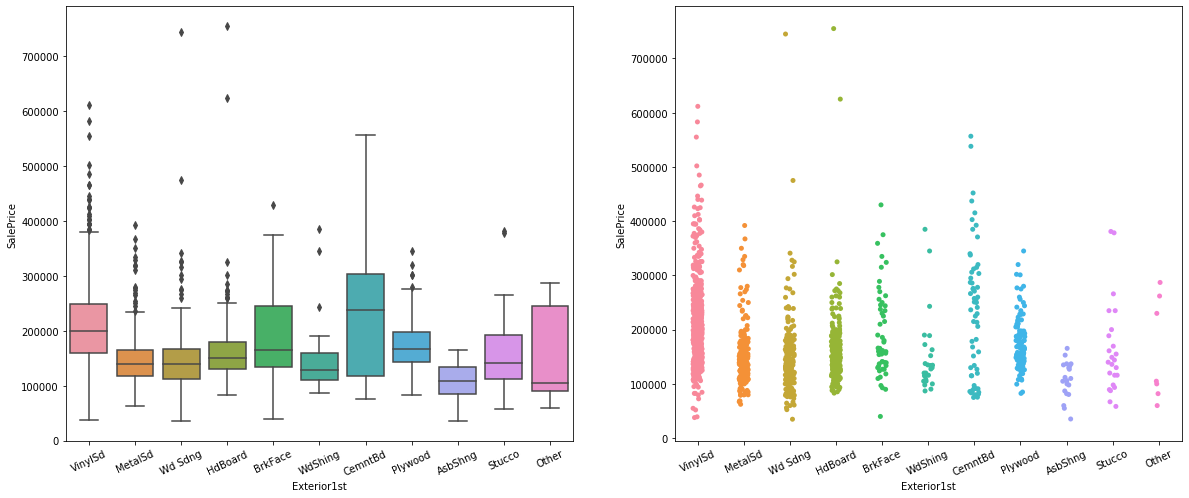

In [114]:
make_discrete_plot('Exterior1st',25,25)

### Exterior2nd¶

> Exterior covering on house (if more than one material).

---





In [0]:
# similar behavior comparing to Exterior1st
dataset = dataset.drop(columns = 'Exterior2nd')

### MasVnrType

> Masonry veneer type.

---





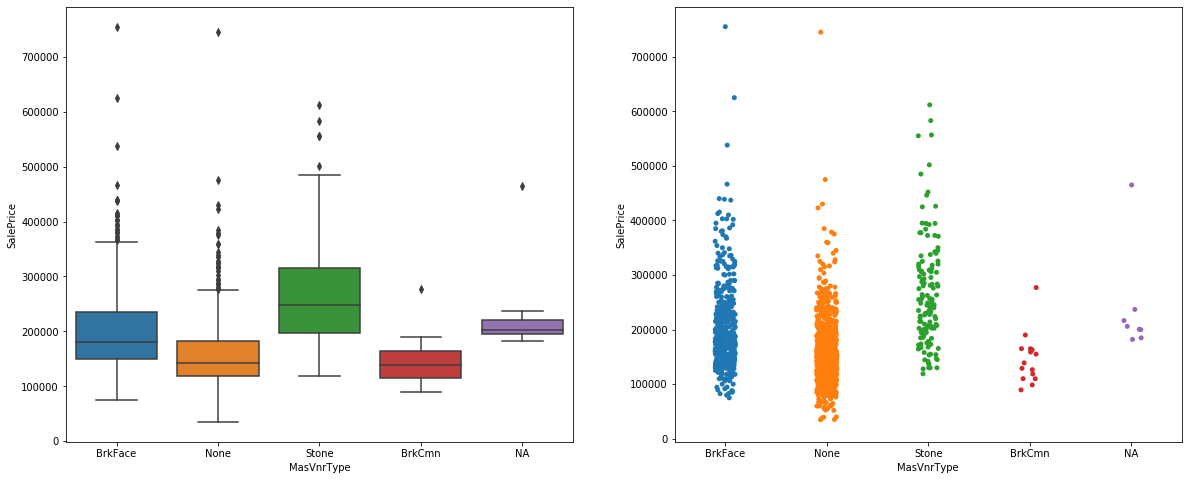

In [116]:
make_discrete_plot('MasVnrType',0,0)

### Foundation
> Type of foundation.

---





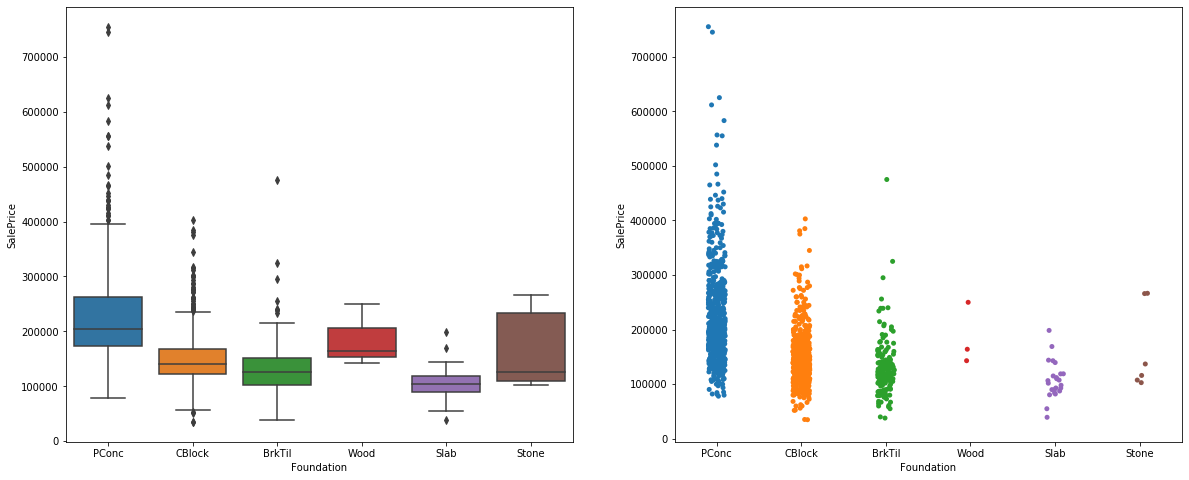

In [117]:
make_discrete_plot('Foundation',0,0)

In [0]:
# few values for Wood and Stone, so I'll decide to put together = Other
dataset.Foundation = dataset.Foundation.apply(lambda x: 'Other' if (x == 'Wood' or x == 'Stone') else x)

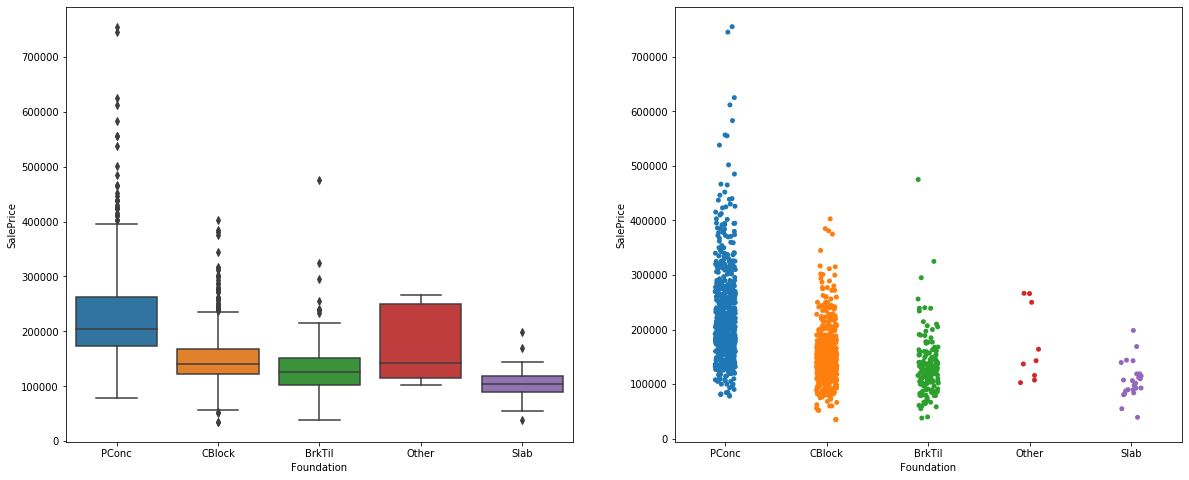

In [119]:
make_discrete_plot('Foundation',0,0)

### Heating

> Type of heating.

---





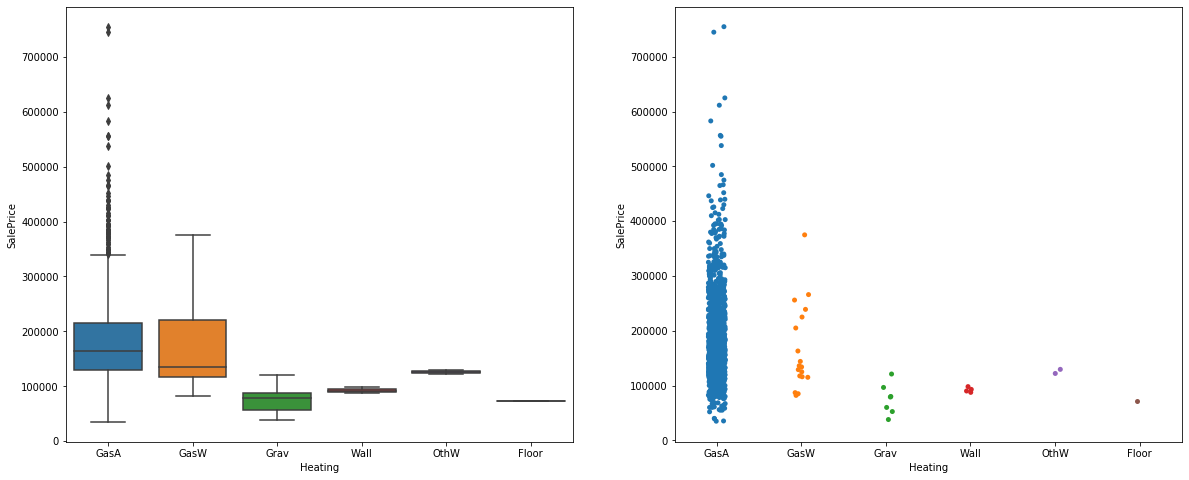

In [120]:
make_discrete_plot('Heating',0,0)

In [0]:
# few values for every category except GasA
dataset.Heating = dataset.Heating.apply(lambda x: 1 if x == 'GasA' else 0)

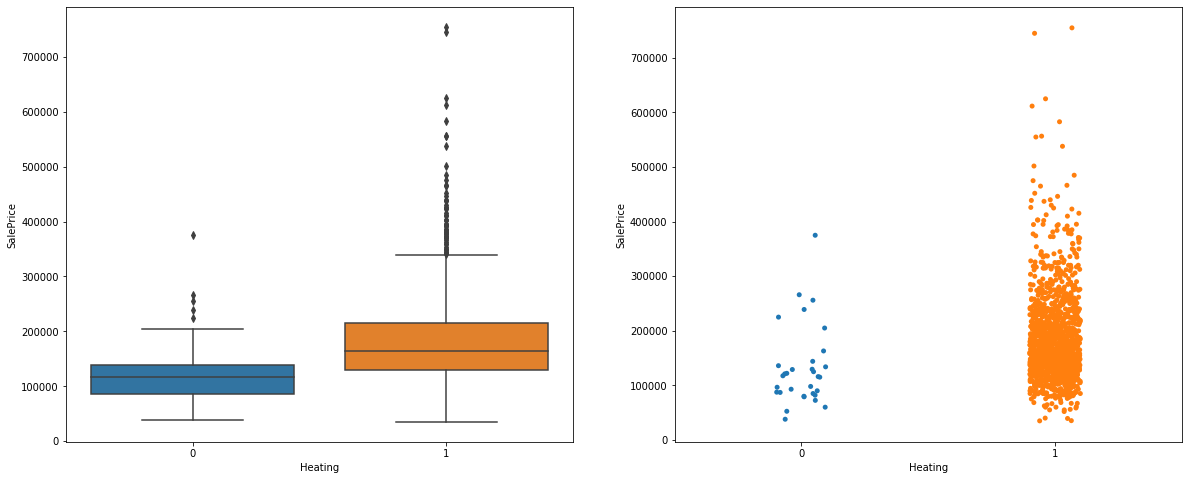

In [122]:
make_discrete_plot('Heating',0,0)

### GarageType

> Garage type.

---





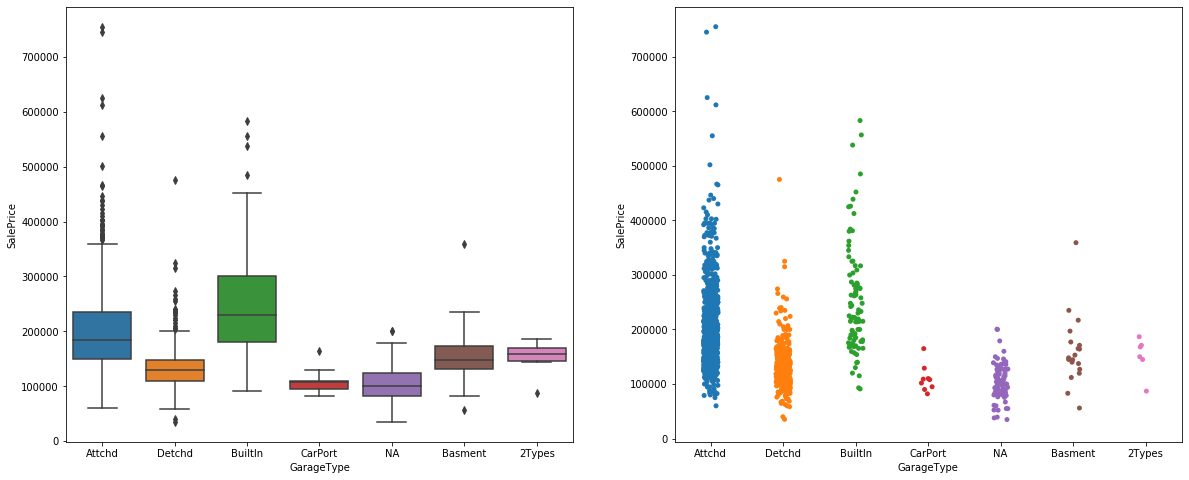

In [123]:
make_discrete_plot('GarageType',0,0)

### MiscFeature

> Miscellaneous feature not covered in other categories.

---





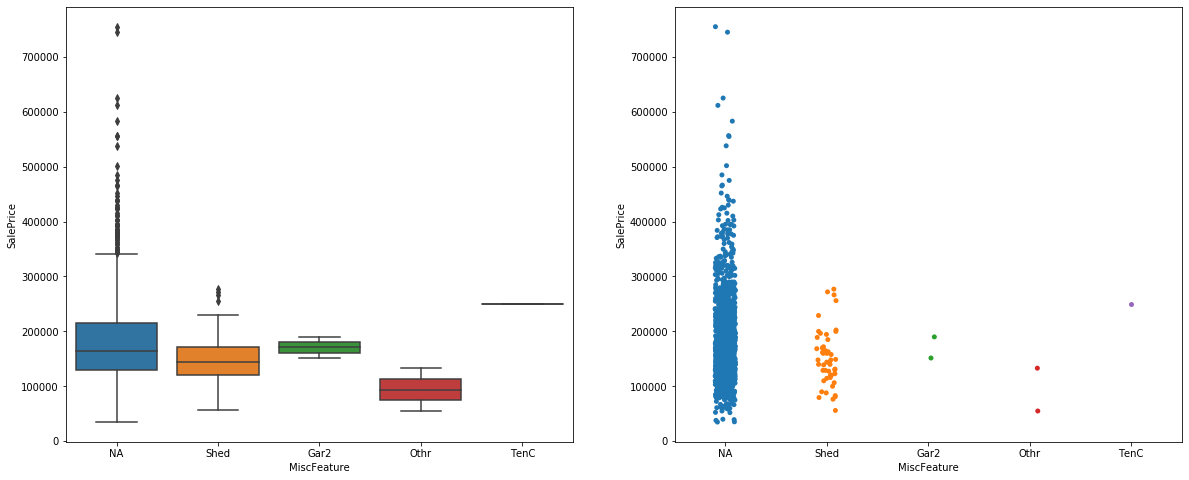

In [124]:
make_discrete_plot('MiscFeature',0,0)

In [0]:
# few values for every category except NA
dataset.MiscFeature = dataset.MiscFeature.apply(lambda x: 0 if x == 'NA' else 1)

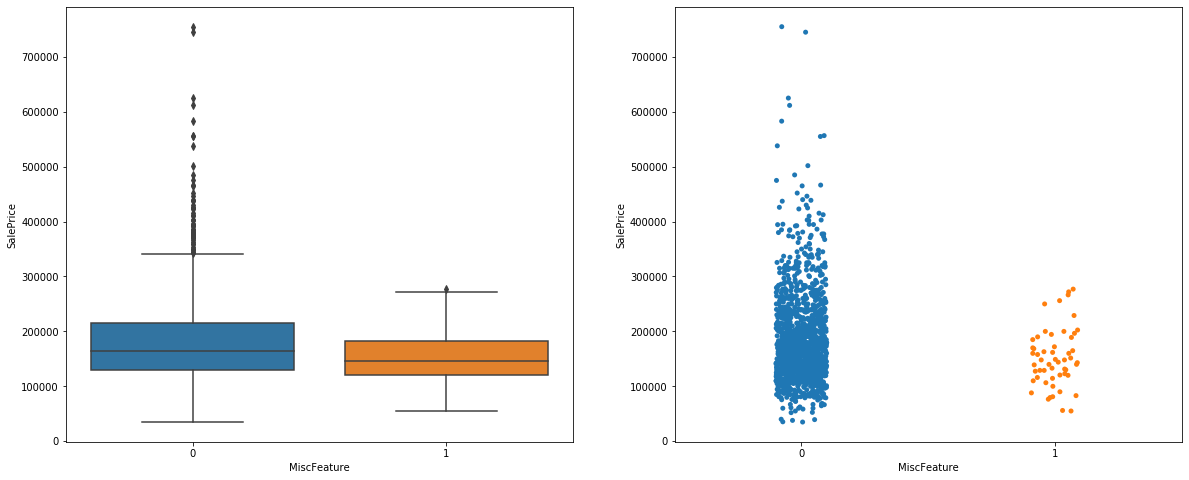

In [126]:
make_discrete_plot('MiscFeature',0,0)

### SaleType

> Indented block

---



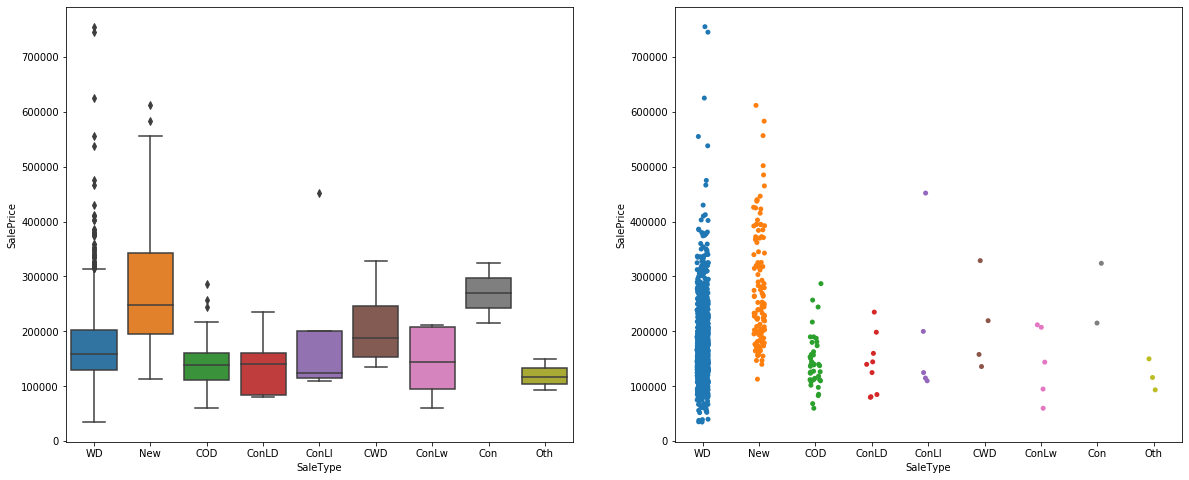

In [127]:
make_discrete_plot('SaleType',0,0)

In [0]:
# few values for every category except WD and New
dataset.SaleType = dataset.SaleType.apply(lambda x: x if (x == 'WD' or x == 'New') else 'Other')

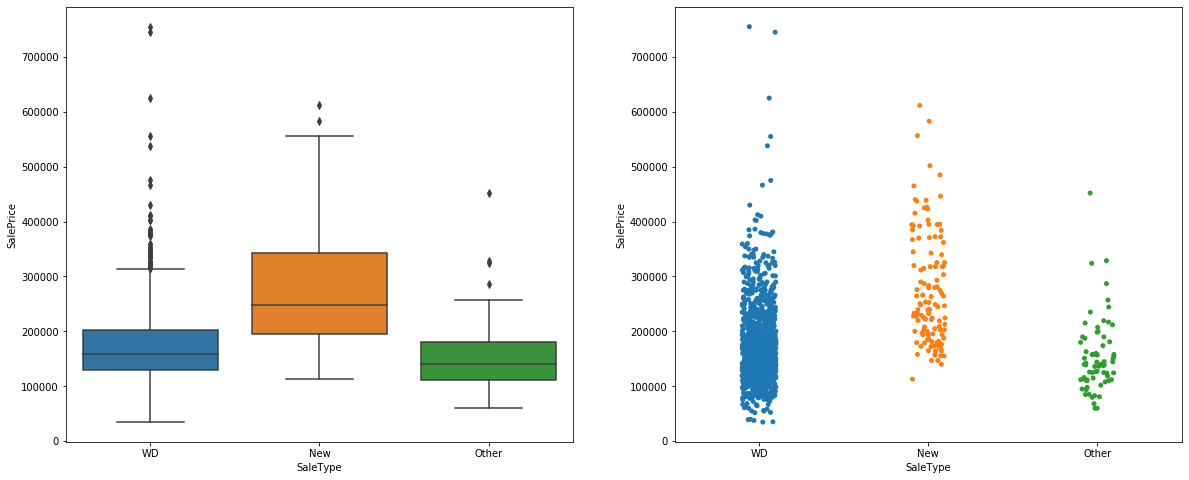

In [129]:
make_discrete_plot('SaleType',0,0)

### SaleCondition

> Condition of Sale.

---





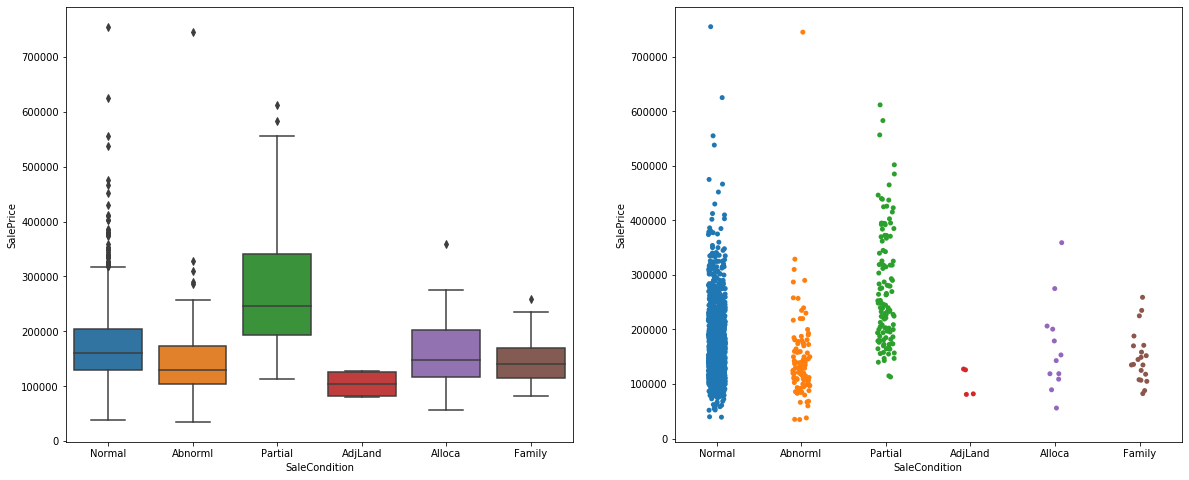

In [130]:
make_discrete_plot('SaleCondition',0,0)

In [0]:
# few values for AdjLand, Alloca and Family
dataset.SaleCondition = dataset.SaleCondition.apply(lambda x: x if (x == 'Normal' or x == 'Abnormal' or x == 'Partial') else 'Other')

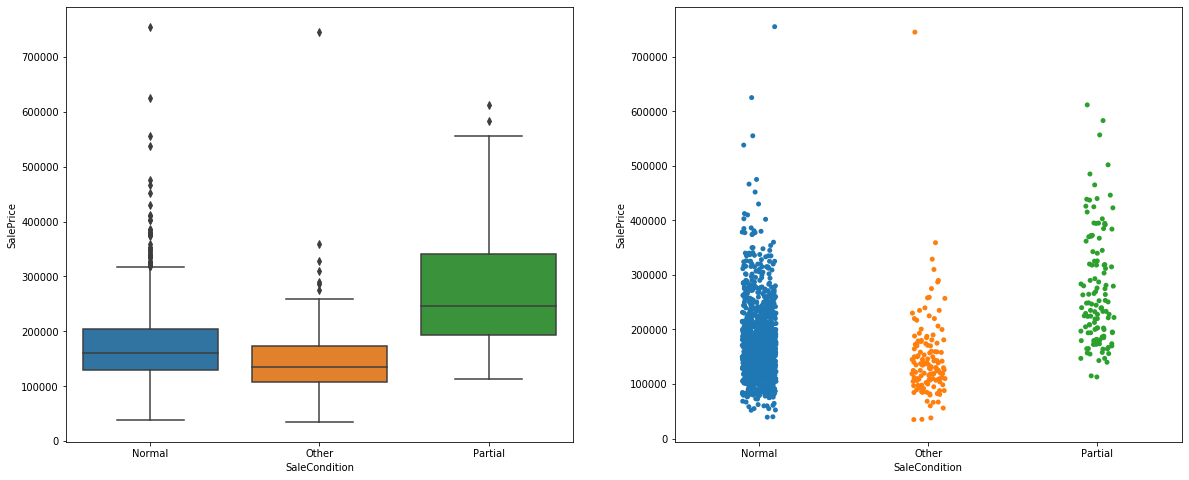

In [132]:
make_discrete_plot('SaleCondition',0,0)

#Train Model

> Here we are going to get dummies(фиктивные значения) for categorical variables, split train and test sets, analyze skewness if yet present for both sets, scale the data (Robust is better for outliers(выбросов)) and, finally, train the model for:
* Lasso
* ElasticNet
* Kernel Ridge
* Gradient Boosting Regressor
* XGBoost
* Light Gradient Boosting




> The tuning parameters were obtained from GridSearchCV.



In [133]:
dataset = dataset.reset_index(drop=True)
dataset.shape

(2917, 79)

In [134]:
# splitting data 
X = dataset.loc[:,dataset.columns.difference(['SalePrice', 'Id'])]
Y = dataset.SalePrice

X = pd.get_dummies(X) # getting dummies
X.head()

1stFlrSF  2ndFlrSF  3SsnPorch  Baths  BsmtFinSF2  BsmtFullBath  \
0       856       854          0    3.5           0           1.0   
1      1262         0          0    2.5           0           0.0   
2       920       866          0    3.5           0           1.0   
3       961       756          0    2.0           0           1.0   
4      1145      1053          0    3.5           0           1.0   

   BsmtHalfBath  EnclosedPorch  Fireplaces  FullBath  GarageArea  GarageCars  \
0           0.0              0           0         2       548.0         2.0   
1           1.0              0           1         2       460.0         2.0   
2           0.0              0           1         2       608.0         2.0   
3           0.0            272           1         1       642.0         3.0   
4           0.0              0           1         2       836.0         3.0   

   GrLivArea  HalfBath  Heating    LotArea  LotFrontage  LowQualFinSF  \
0       1710         1        1  19.212182     9.524331             0   
1       1262         0        1  19.712205    10.444391             0   
2       1786         1        1  20.347241     9.718469             0   
3       1717         0        1  19.691553     9.187596             0   
4       2198         1        1  21.325160    10.670701             0   

   MSSubClass  MasVnrArea  MiscFeature  MiscVal  OpenPorchSF  OverallCond  \
0          60    8.059126            0        0           61            5   
1          20    0.000000            0        0            0            8   
2          60    7.646538            0        0           42            5   
3          70    0.000000            0        0           35            5   
4          60    9.391827            0        0           84            5   

   OverallQual  PoolArea  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
0            7         0            0             8        856.0           0   
1            6         0            0             6       1262.0         298   
2            7         0            0             6        920.0           0   
3            7         0            0             7        756.0           0   
4            8         0            0             9       1145.0         192   

   Alley_Grvl  Alley_NA  Alley_Pave  BedroomAbvGr_0  BedroomAbvGr_1  \
0           0         1           0               0               0   
1           0         1           0               0               0   
2           0         1           0               0               0   
3           0         1           0               0               0   
4           0         1           0               0               0   

   BedroomAbvGr_2  BedroomAbvGr_3  BedroomAbvGr_4  BedroomAbvGr_5  \
0               0               1               0               0   
1               0               1               0               0   
2               0               1               0               0   
3               0               1               0               0   
4               0               0               1               0   

   BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_NA  BsmtCond_Po  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            1            0            0   
4                0            0            0            0            0   

   BsmtCond_TA  



> Analyzing skewness and replacing column with the best transformation (boxcox with different lambdas, log or keep the column as it is).


![alt text](https://www.oreilly.com/library/view/statistical-inference-a/9781118309803/images/c03/nfg005.gif)

[Image source](https://www.oreilly.com/library/view/statistical-inference-a/9781118309803/c03anchor-8.html)


In [0]:
skewness = list(abs(stats.skew(X)) > 0.7)
counter = 0
lambdas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
for i in X.columns:
    if skewness[counter] == True:
        idx = np.argmin([abs(stats.skew(boxcox1p(X[i], 0.1))),
                         abs(stats.skew(boxcox1p(X[i], 0.15))),
                         abs(stats.skew(boxcox1p(X[i], 0.2))),
                         abs(stats.skew(boxcox1p(X[i], 0.25))),
                         abs(stats.skew(boxcox1p(X[i], 0.3))),
                         abs(stats.skew(boxcox1p(X[i], 0.35))),
                         abs(stats.skew(boxcox1p(X[i], 0.4))),
                         abs(stats.skew(boxcox1p(X[i], 0.45))),
                         abs(stats.skew(np.log1p(X[i]))),
                         abs(stats.skew(X[i]))])
        if idx < 8:
            X[i] = boxcox1p(X[i], lambdas[idx])
        if idx == 8:
            X[i] = np.log1p(X[i])
    counter = counter + 1



> Scaling with RobustScaler (better for treating outliers). You can see the types of Scaling in the link below. 
* [Types of Scaling](http://benalexkeen.com/feature-scaling-with-scikit-learn/)






In [0]:
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [137]:
# train and test
X_train = X.iloc[0:1457].as_matrix()
Y_train = Y.iloc[0:1457].as_matrix()
X_test = X.iloc[1457:].as_matrix()
test_ids = dataset.Id.iloc[1457:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until




> Same skewness analysis for target variable.



In [0]:
lambdas = [0.15, 0.25, 0.35, 0.45]
idx = np.argmin([abs(stats.skew(boxcox1p(Y_train, 0.15))),
                 abs(stats.skew(boxcox1p(Y_train, 0.25))),
                 abs(stats.skew(boxcox1p(Y_train, 0.35))),
                 abs(stats.skew(boxcox1p(Y_train, 0.45))),
                 abs(stats.skew(np.log1p(Y_train)))])
if idx < 4:
    Y_train = boxcox1p(Y_train, lambdas[idx])
if idx == 4:
            Y_train = np.log1p(Y_train)

In [139]:
idx

4



> For the target variable, the log transformation is better.



## Lasso
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [0]:
lasso = Lasso(alpha= 0.0005) # alpha was obtained with GridSearchCV

## Elastic Net
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [0]:
elastic = ElasticNet(alpha=0.0005, l1_ratio=.9)  # parameters was obtained with GridSearchCV

## Kernel Ridge
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)


> GridSearch for Ridge.


```
# This is formatted as code
k_ridge = KernelRidge()

param_grid = {'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'kernel':['polynomial'], 
              'degree':[2,3,4,5,6,7,8],
              'coef0':[0,1,1.5,2,2.5,3,3.5,10]}

k = GridSearchCV(k_ridge, 
                 param_grid = param_grid, 
                 cv = 10, 
                 scoring = "neg_mean_squared_error", 
                 n_jobs = -1, 
                 verbose = 1)

k.fit(X_train,Y_train)

k_best = k.best_estimator_

k.best_score_
```


In [0]:
k_ridge = KernelRidge(alpha=0.1, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
            kernel_params=None)

## GBR
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


> GridSearch for GBR.





```
# This is formatted as code
GBMR = GradientBoostingRegressor()

GBMR_param_grid = {'loss': ['huber'],
                   'n_estimators':[3000,3300], 
                   'learning_rate':[0.01],
                   'max_depth':[3,5], 
                   'max_features':[18,20],
                   'min_samples_leaf':[2,3], 
                   'min_samples_split':[3,5]}

gsGBMR = GridSearchCV(GBMR, 
                      param_grid = GBMR_param_grid, 
                      cv = 5, 
                      scoring = "neg_mean_squared_error", 
                      n_jobs = -1, 
                      verbose = 1)

gsGBMR.fit(X_train,Y_train)

GBMR_best = gsGBMR.best_estimator_

gsGBMR.best_score_

```



In [0]:
xg_boost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='huber',
                          max_depth=3, max_features=18, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=3300,
                          n_iter_no_change=None,random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Light GBM
[Docs](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html#lightgbm.LGBMRegressor)



> GridSearch for Light GBM.



```
LGBMR = LGBMRegressor()

LGBMR_param_grid = {'objective':['regression','dart','goss','rf'],
                    'num_leaves':[7],
                    'learning_rate':[0.01], 
                    'n_estimators': [3300],
                    'max_depth':[4], 
                    'max_bin': [65],
                    'bagging_fraction':[0.6],
                    'bagging_freq':[9], 
                    'feature_fraction':[0.1],
                    'feature_fraction_seed':[1],
                    'bagging_seed':[14],
                    'min_data_in_leaf':[5], 
                    'min_sum_hessian_in_leaf':[5],
                    'colsample_bytree':[0],
                    'reg_alpha':[0.2],
                    'reg_lambda':[0.1]}

gsLGBMR = GridSearchCV(LGBMR, 
                      param_grid = LGBMR_param_grid, 
                      cv = 10, 
                      scoring = "neg_mean_squared_error", 
                      n_jobs = -1, 
                      verbose = 1)

gsLGBMR.fit(X_train,Y_train)

LGBMR_best = gsLGBMR.best_estimator_

gsLGBMR.best_score_
```



In [0]:
lgbm = LGBMRegressor(bagging_fraction=0.6, bagging_freq=9, bagging_seed=14,
              boosting_type='gbdt', class_weight=None, colsample_bytree=0,
              feature_fraction=0.1, feature_fraction_seed=1,
              importance_type='split', learning_rate=0.01, max_bin=65,
              max_depth=4, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=5, min_split_gain=0.0, min_sum_hessian_in_leaf=5,
              n_estimators=3300, n_jobs=-1, num_leaves=7,
              objective='regression', random_state=None, reg_alpha=0.2,
              reg_lambda=0.1, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

# Stacking Regressor
[Docs](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/)



> Here I decided to choose some models to be regressors and lasso to be the meta regressor. Lasso seems to be a good model for this competition, thats why it will be the meta.

![alt text](https://miro.medium.com/max/1183/0*GHYCJIjkkrP5ZgPh.png)

[Image Source](https://miro.medium.com/max/1183/0*GHYCJIjkkrP5ZgPh.png)



In [145]:
stacking = StackingRegressor(regressors=(elastic, g_boost, k_ridge),
                             meta_regressor = lasso)

param_grid = {} 

stack = GridSearchCV(stacking, 
                   param_grid = param_grid,
                   cv = 10, 
                   scoring = "neg_mean_squared_error",
                   n_jobs = 5, 
                   verbose = 1)

stack.fit(X_train,Y_train)

s_best = stack.best_estimator_

stack.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  1.1min finished


-0.012530036467380835

In [0]:
stacking = s_best

# Voting Regressor
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)


> A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.



> Here I used the other models not yet trained to be combined with the Stacking Regressor and make a powerful one, using the Voting Regressor.





In [154]:
voting = VotingRegressor(estimators=[('xgboost', xg_boost), 
                                     ('lgbm', lgbm),
                                     ('stacking', stacking)])

v_param_grid = {} # tuning voting parameter

gsV = GridSearchCV(voting, 
                   param_grid = v_param_grid,
                   cv = 10, 
                   scoring = "neg_mean_squared_error",
                   n_jobs = 5, 
                   verbose = 1)

gsV.fit(X_train,Y_train)

v_best = gsV.best_estimator_

gsV.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  2.2min finished


-0.011422180345824796

In [0]:
voting = v_best